1. Definición del Objetivo

2. Contexto Comercial

Las calificaciones crediticias corporativas, proporcionan una evaluación sobre la solvencia crediticia de una empresa y actúan como un indicador financiero fundamental para los potenciales inversionistas. 

Estas ayudan a entregar a los futuros accionistas una idea concreta sobre el riesgo asociado a la inversión en una empresa en particular, a través de los rendimientos de las inversiones crediticias que posee la empresa. 

Toda empresa aspira a obtener una buena calificación crediticia con el objetivo de buscar más inversionistas y tasas de interés de deuda más bajos.

3. Problema Comercial

4. Data Acquisition

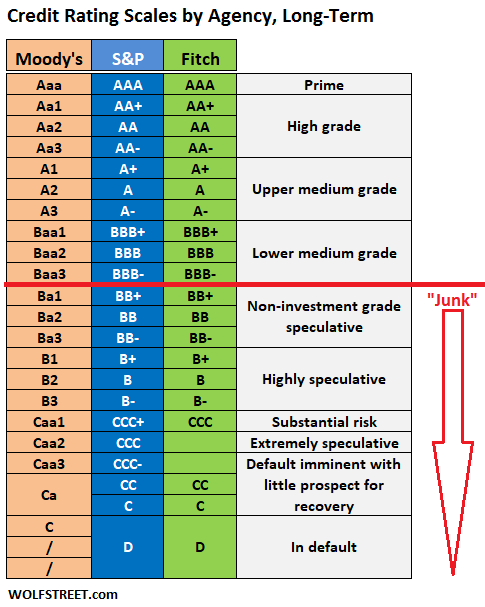

4.1 Importar Librerías

In [1]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn as sk
import bokeh as bk
import plotly as ply
import scipy as sci
import scipy.stats as stats
import statsmodels.api as sm
import ptitprince as pt

4.2 Obtención Datos

In [2]:
# Fuente: https://www.kaggle.com/datasets/kirtandelwadia/corporate-credit-rating-with-financial-ratios/data
url = 'https://raw.githubusercontent.com/jfdonosom/Data_Bases/main/Corporate_Credit_Rating_With_Financial_Ratios.csv'
df = pd.read_csv(url)
df.head(5)

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [3]:
df.tail(5)

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
7800,Moody's Investors Service,"eBay, Inc.",BBB+,2016-02-22,1065088,1,7370.0,BusEq,EBAY,3.4927,...,33.5661,28.0028,20.0768,0.4839,29.6077,95.6757,10.9659,14.6116,-1.2323,-1.2826
7801,Moody's Investors Service,"eBay, Inc.",BBB+,2016-03-02,1065088,1,7370.0,BusEq,EBAY,3.4927,...,33.5661,28.0028,20.0768,0.4839,29.6077,95.6757,10.9659,14.6116,-1.2323,-1.2826
7802,Standard & Poor's Ratings Services,iHeartCommunications Inc.,CC,2016-03-08,739708,0,4832.0,Telcm,CCU,1.7606,...,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552
7803,Standard & Poor's Ratings Services,iHeartCommunications Inc.,CCC,2016-03-24,739708,0,4832.0,Telcm,CCU,1.7606,...,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552
7804,Standard & Poor's Ratings Services,iHeartCommunications Inc.,CC,2016-06-14,739708,0,4832.0,Telcm,CCU,1.7606,...,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552


In [4]:
df.shape

(7805, 25)

In [5]:
df.columns

Index(['Rating Agency', 'Corporation', 'Rating', 'Rating Date', 'CIK',
       'Binary Rating', 'SIC Code', 'Sector', 'Ticker', 'Current Ratio',
       'Long-term Debt / Capital', 'Debt/Equity Ratio', 'Gross Margin',
       'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Operating Cash Flow Per Share', 'Free Cash Flow Per Share'],
      dtype='object')

4.3 Descripción Variables

In [6]:
# Fuentes: https://finviz.com/help/screener.ashx , https://www.sec.gov/search-filings/standard-industrial-classification-sic-code-list ,  

# Corporation: Nombre de la Empresa.
# Rating: Calificación Otorgada por la Agencia Especialista - Calificación S&P Decreciente {AAA, AA+, AA, AA−, A+, A, A−, BBB+, BBB, BBB−, BB+, BB, BB−, B+, B, B−, CCC+, CCC, CCC−, CC, C, D}
# Rating Date: Fecha de Calificación.
# CIK: Identificador único de la Compañía provisto por el SEC (Security and Exchange Comission).
# Binary Rating: Calificación Binaria (1: Empresas con Grado de Inversión, 0: Empresas Basura) 
# SIC Code: Estándar Industrial de Clasificación (USA) - Indica el tipo de Negocio asociado a la Empresa.
# Sector: Grupos en función de las actividades de la Compañia en las cuales se agrupan diferentes Empresas. Relación Directa con el Código SIC.
# Ticker: Abreviación Empresa para Cotizar en Bolsa (Identificador Único)
# Current Ratio: Radio de Liquidez, que mide la capacidad de una empresa para pagar sus obligaciones en el corto plazo. Ratio Actual = Activos Actuales / Pasivos Actuales.
# Long-term Debt / Capital: Ratio que mide el Apalancamiento Financiero de una Compañía. Indica que proporción de las acciones y deuda la compañía está utilizando para financiar sus activos en el Largo Plazo. (Pasivos LP / Capital Accionistas)
# Debt/Equity Ratio (D/E): Ratio que mide el Apalancamiento Financiero de una Compañía. Indica que proporción de las acciones y deuda la compañía está utilizando para financiar sus activos en el Corto Plazo. (Pasivos Actuales / Capital Accionistas)                                              
# Gross Margin: Porcentaje del total de Ingresos por Ventas que la Compañía retiene después de incurrir en los costos directos de producción de un Bien o Servicio. Margen Bruto = (Ingresos Ventas - Costos Fijos Producción) / Ingresos Ventas 
# Operating Margin: Indica qué proporción de la ganancia de la compañía queda, luego de pagar los costos variables de producción, tales como salarios, insumos, etc. Margen Operacional = Ingresos Operacionales / Ingresos Totales Ventas. 
# EBIT Margin: Earnings Before Interest and Taxes. Ratio que nos indica la rentabilidad de una empresa. Se calcula como las ganancias de esta menos los gatos, exluyendo los impuestos e intereses.
# EBITDA Margin: Earnings Before Interest, Taxes, Depreciation and Amortization. Ratio o medida de rentabilidad, alternativo al Ingreso Neto, el cual busca representar el beneficio en efectivo generado por las operaciones de la compañía.
# Pre-Tax Profit Margin: Mide las ganancias remantentes de la empresa, después de que los gastos operacionales y no operacionales, sin considerar los impuestos, hayan sido descontados. Ganancia Previa a los Impuestos = EBT (Ganancias antes de Impuestos) / Ingresos.
# Net Profit Margin: Ratio de Rentabilidad que mide cuanto de cada Dólar por Ventas, la compañía mantiene como ganancia. Beneficio Neto = Ganancia Neta / Ingresos por Venta.
# Asset Turnover: Mide la eficiencia de los activos de una compañía para generar Ingresos o Ventas. Rotación de Activos = Ingresos por Ventas / Promedio Total de Activos.
# ROE - Return On Equity: Ratio de Rentabilidad que indica cuanta ganancia genera la compañía con el dinero que lo accionistas han invertido en ella. ROE = Ingreso Neto Anual / Capital Accionistas
# Return On Tangible Equity (ROTE): Mide la Eficiencia con la cual una compañía opera y utiliza sus Activos Tangibles para generar Ingresos en el Largo Plazo. ROTE = Ingreso Neto Anual / (Promedio Capital Accionistas - Activos Intangibles)
# ROA - Return On Assets: Indicador que nos da una idea sobre que tan eficiente es la gerencia de una compañía utilizando sus activos para generar ingresos. ROA = ingresos Netos Anuales / Total Activos.
# ROI - Return On Investment: Medida de Desempeño, utilizada para evaluar la eficiencia de una inversión. ROI = (Ingresos de Inversión - Costos de Inversión) / Costos de Inversión
# Operating Cash Flow Per Share: Cantidad de efectivo que genera una empresa a partir de los Ingresos que genera, excluyendo los costos asociados con la Inversión de Capital a Largo Plazo. Medido en lo últimos 12 Meses (TTM)
# Free Cash Flow Per Share: Medida de la Flexibilidad Financiera de una empresa que se determina dividiendo el Flujo de Caja Libre por el número total de Acciones en Circulación. Indicador de los cambios en las ganancias por acción.

In [7]:
# Clasificación de Ratios por Tipo:

# Ratios de Liquidez: Current Ratio.
# Ratios de Rentabilidad: Gross Margin, Operating Margin, EBIT Margin, EBITDA Margin, Pre-Tax Profit Margin, Net Profit Margin, ROE - Return On Equity, Return On Tangible Equity (ROTE), ROA - Return On Assets, ROI - Return On Investment.
# Ratios de Deuda (Pasivos): Long-Term Debt / Capital, Debt/Equity Ratio (D/E).
# Ratios de Desempeño Operacional: Asset Turnover.
# Ratios de Flujo de Caja: Operating Cash Flow Per Share, Free Cash Flow Per Share.

5. Exploratory Data Analysis (EDA)

In [8]:
df['Rating Agency'].unique()

array(["Standard & Poor's Ratings Services", 'DBRS',
       "Moody's Investors Service", 'Fitch Ratings',
       'Japan Credit Rating Agency,Ltd.',
       'HR Ratings de Mexico S.A. de C.V.', 'Egan-Jones Ratings Company'],
      dtype=object)

In [9]:
df.duplicated().sum()

0

In [10]:
# Eliminamos Columna Rating Agency (axis=0 filas, axis=1 columnas)
# Asumimos que la Agencia de Clasificación es una entidad Neutral y que no existen juicios subjetivos de la evaluación de una empresa entre una y otra agencia.
df = df.drop('Rating Agency', axis=1)

In [11]:
# Eliminamos las columnas CIK y SIC Code, ya que estas solo son identificadores únicos de la empresa y de la Industria a la cual pertenecen. En términos de comprensión, se hace más fácil trabajar con la Columnas Corportation y Sector, las cuales entregan mucha más información.
df = df.drop(columns=['CIK', 'SIC Code'])
df.head(5)

,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,American States Water Co.,A-,2010-07-30,1,Utils,AWR,1.1507,0.4551,0.8847,77.6230,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Automatic Data Processing Inc.,AAA,2010-09-16,1,BusEq,ADP,1.1129,0.0072,0.0073,43.6619,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Avnet Inc.,BBB-,2010-11-23,1,Shops,AVT,1.9276,0.2924,0.4255,11.9008,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,California Water Service Co.,AA-,2010-06-29,1,Utils,CWT,0.8358,0.4708,0.9491,64.5096,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Cardinal Health Inc.,A,2010-07-14,1,Shops,CAH,1.2931,0.2644,0.4036,3.8385,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [12]:
df.shape

(7805, 22)

In [13]:
# Verificamos que No exista más de una agencia que califique en una misma fecha con los mismos valores a una misma empresa.
df.duplicated().sum()

0

In [14]:
# Equilibrio Muestra 'Binary Rating', Invertir o No Invertir.
((df.value_counts('Binary Rating')/len(df))*100).round(1)

Binary Rating
1    65.3
0    34.7
Name: count, dtype: float64

In [15]:
# Equilibrio Muestra 'Rating', Calificación S&P.
(df.value_counts('Rating')/len(df)*100).round(1).sort_index(ascending=True)

Rating
A       10.7
A+       6.1
A-       9.3
AA       2.4
AA+      0.9
AA-      3.3
AAA      1.2
B        4.0
B+       5.4
B-       3.7
BB       5.8
BB+      7.0
BB-      5.5
BBB     11.7
BBB+    10.8
BBB-     9.0
C        0.1
CC       0.2
CC+      0.0
CCC      0.8
CCC+     1.9
CCC-     0.1
D        0.1
Name: count, dtype: float64

Muestra efectivamente desbalanceada. Debemos crear nuevas agrupaciones para que nuestros datos de entrenamiento sean balanceados y no se produzca Overfitting (Sobreajuste) en el Modelo Predictivo.

In [16]:
((df.groupby(['Binary Rating','Rating']).size())/len(df)*100).round(1)

Binary Rating  Rating
0              B          4.0
               B+         5.4
               B-         3.7
               BB         5.8
               BB+        7.0
               BB-        5.5
               C          0.1
               CC         0.2
               CC+        0.0
               CCC        0.8
               CCC+       1.9
               CCC-       0.1
               D          0.1
1              A         10.7
               A+         6.1
               A-         9.3
               AA         2.4
               AA+        0.9
               AA-        3.3
               AAA        1.2
               BBB       11.7
               BBB+      10.8
               BBB-       9.0
dtype: float64

In [17]:
# De acuerdo a la información otorgada por Wolfstreet.com (https://wolfstreet.com/credit-rating-scales-by-moodys-sp-and-fitch/), generamos nuevas agrupaciones para equilibrar la muestra.

df['Rating'] = df['Rating'].replace({'AAA': 'Alta', 'AA+': 'Alta', 'AA': 'Alta', 'AA-': 'Alta', 
                                     'A+': 'Media Superior', 'A': 'Media Superior', 
                                     'A-': 'Media', 'BBB+': 'Media', 
                                     'BBB': 'Media Inferior', 'BBB-': 'Media Inferior', 
                                     'BB+': 'Especulativa', 'BB': 'Especulativa', 
                                     'BB-': 'Altamente Especulativa', 'B+': 'Altamente Especulativa', 'B': 'Altamente Especulativa', 
                                     'B-': 'Riesgo Sustancial', 'CCC+': 'Riesgo Sustancial', 'CCC': 'Riesgo Sustancial', 'CCC-': 'Riesgo Sustancial', 
                                     'CC+': 'Riesgo Sustancial', 'CC': 'Riesgo Sustancial', 'C': 'Riesgo Sustancial', 'D': 'Riesgo Sustancial'})

In [18]:
# Variables Categóricas Ordinales.
# Ordinal Encoder
# Como el sistema NO necesariamente asocia el orden lógico ordinal de la clasificación, es necesario crear un diccionario y asociarlos uno a uno.
evaluacion = ['Alta', 'Media Superior', 'Media', 'Media Inferior', 'Especulativa', 'Altamente Especulativa', 'Riesgo Sustancial']
codificador = range(7,0,-1)
mapping = {rating: code for rating, code in zip(evaluacion, codificador)}
df['Rating_OE'] = df['Rating'].map(mapping)
#from sklearn.preprocessing import OrdinalEncoder
#ord = OrdinalEncoder()

# Transformar los datos
#df['Rating_OE'] = ord.fit_transform(df[['Rating']]).astype('int64')

In [19]:
df['Rating_OE'] = df['Rating_OE'].astype('int64')

In [20]:
nuevo_rating = df[['Rating','Rating_OE']].sort_values(by='Rating_OE',ascending=False)
nuevo_rating

,Rating,Rating_OE
3651,Alta,7
6019,Alta,7
2042,Alta,7
2033,Alta,7
2032,Alta,7
...,...,...
4767,Riesgo Sustancial,1
4813,Riesgo Sustancial,1
4816,Riesgo Sustancial,1
4818,Riesgo Sustancial,1


In [21]:
print((df.groupby(['Binary Rating', 'Rating', 'Rating_OE']).size()/len(df)*100).round(1))

Binary Rating  Rating                  Rating_OE
0              Altamente Especulativa  2            14.8
               Especulativa            3            12.8
               Riesgo Sustancial       1             7.0
1              Alta                    7             7.7
               Media                   5            20.1
               Media Inferior          4            20.7
               Media Superior          6            16.8
dtype: float64


In [22]:
# Pie Chart 1
import plotly.express as px

fig = px.pie(values=df.value_counts(), 
             names=df['Rating'], title='Distribución Clasificación Empresas')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [23]:
# Equilibrio Muestra 'Sector', Industria a la cual pertenece.
(df.value_counts('Sector')/len(df)*100).round(1).sort_values(ascending=False)

Sector
Other    16.0
Manuf    12.6
BusEq    12.3
Utils    10.8
Shops    10.1
Enrgy     8.5
Hlth      8.0
NoDur     7.3
Telcm     4.9
Chems     4.0
Durbl     2.8
Money     2.7
Name: count, dtype: float64

In [24]:
# Reclasificamos los sectores de acuerdo a la nomenclatura vigente de S&P.
# S&P Sectors: https://corporatefinanceinstitute.com/resources/valuation/the-sp-sectors/

#BusEq - Information Technology: The information technology – IT – sector consists of companies that develop or distribute technological items or services, and includes internet companies. Technology products include computers, microprocessors, and operating systems. 
#Chems - Materials: Companies within the materials sector provide the raw materials needed for other sectors to function. This includes the mining companies that provide gold, zinc, and copper, and forestry companies that provide wood.    
#Durbl - Consumer Discretionary: Discretionary consumer products are luxury items or services that are not necessary for survival. The demand for these items depends on economic conditions and the wealth of individuals.
#Enrgy - Energy: The energy sector consists of all companies that play a part in the oil, gas, and consumable fuels business. This includes companies that find, drill, and extract the commodity.
#Hlth -  Health Care: Health care consists of medical supply companies, pharmaceutical companies, and scientific-based operations or services that aim to improve the human body or mind.      
#Manuf - Industrials: ndustrials include a wide range of companies, from airlines and railroad companies to military weapons manufacturers. Two of the largest industries are Aerospace & Defense and Construction & Engineering.      
#Money - Financials: The financial sector includes all companies involved in finance, investing, and the movement or storage of money. It includes banks, credit card issuers, credit unions, insurance companies, and mortgage real estate investment trusts (REITs).     
#NoDur - Consumer Staples: Consumer staples companies provide all the necessities of life. This includes food and beverage companies, household product providers, and personal product providers. Consumer staple companies are well known, since people see their products in stores regularly.   
#Other - Other: Industries that cannot be classified on a single sector.   
#Shops - Consumer Staples: Consumer staples companies provide all the necessities of life. This includes food and beverage companies, household product providers, and personal product providers. Consumer staple companies are well known, since people see their products in stores regularly.
#Telcm - Communication Services: The communication services sector consists of companies that keep people connected. This includes internet providers and phone plan providers. The more exciting part of the sector includes media, entertainment, and interactive media & services companies.    
#Utils - Utilities: Utility companies provide or generate electricity, water, and gas to buildings and households.

In [25]:
df['Sector'] = df['Sector'].replace({'BusEq': 'Information Technology', 'Chems': 'Materials', 'Durbl': 'Consumer Discretionary', 
                                     'Enrgy': 'Energy', 'Hlth': 'Health Care', 'Manuf': 'Industrials', 'Money': 'Financials', 
                                     'NoDur': 'Consumer Staples', 'Shops': 'Consumer Staples', 'Telcm': 'Communication Services', 'Utils': 'Utilities'})

In [26]:
# Equilibrio Muestra 'Sector', Industria a la cual pertenece.
(df.value_counts('Sector')/len(df)*100).round(1).sort_values(ascending=False)

Sector
Consumer Staples          17.3
Other                     16.0
Industrials               12.6
Information Technology    12.3
Utilities                 10.8
Energy                     8.5
Health Care                8.0
Communication Services     4.9
Materials                  4.0
Consumer Discretionary     2.8
Financials                 2.7
Name: count, dtype: float64

In [27]:
# Pie Chart 2
import plotly.express as px

fig = px.pie(values=df.value_counts(), 
             names=df['Sector'], title='Clasificación Empresas por Sector')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [28]:
# Variables Categóricas Nominales (No importa el Orden).
# Label Encoder - Utilizamos One Hot Encoder, ya que las Variables Nominales no poseen un Orden Jerárquico en sus Categorías. 
df.Sector.value_counts()

Sector
Consumer Staples          1353
Other                     1251
Industrials                981
Information Technology     958
Utilities                  843
Energy                     665
Health Care                625
Communication Services     386
Materials                  315
Consumer Discretionary     221
Financials                 207
Name: count, dtype: int64

In [29]:
# Variables Dummies o Binarias
pd.get_dummies(df.Sector).head(5)

,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Other,Utilities
0,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,False


In [30]:
pd.get_dummies(df.Sector, prefix= 'Sector')

,Sector_Communication Services,Sector_Consumer Discretionary,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Other,Sector_Utilities
0,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7800,False,False,False,False,False,False,False,True,False,False,False
7801,False,False,False,False,False,False,False,True,False,False,False
7802,True,False,False,False,False,False,False,False,False,False,False
7803,True,False,False,False,False,False,False,False,False,False,False


In [31]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
# Instanciar el método
LE = LabelEncoder()
# Transformar los datos
df['Sector_LE'] = LE.fit_transform(df['Sector'].astype(str))

In [32]:
df[['Sector', 'Sector_LE']].value_counts().sort_index()

Sector                  Sector_LE
Communication Services  0             386
Consumer Discretionary  1             221
Consumer Staples        2            1353
Energy                  3             665
Financials              4             207
Health Care             5             625
Industrials             6             981
Information Technology  7             958
Materials               8             315
Other                   9            1251
Utilities               10            843
Name: count, dtype: int64

<Axes: >

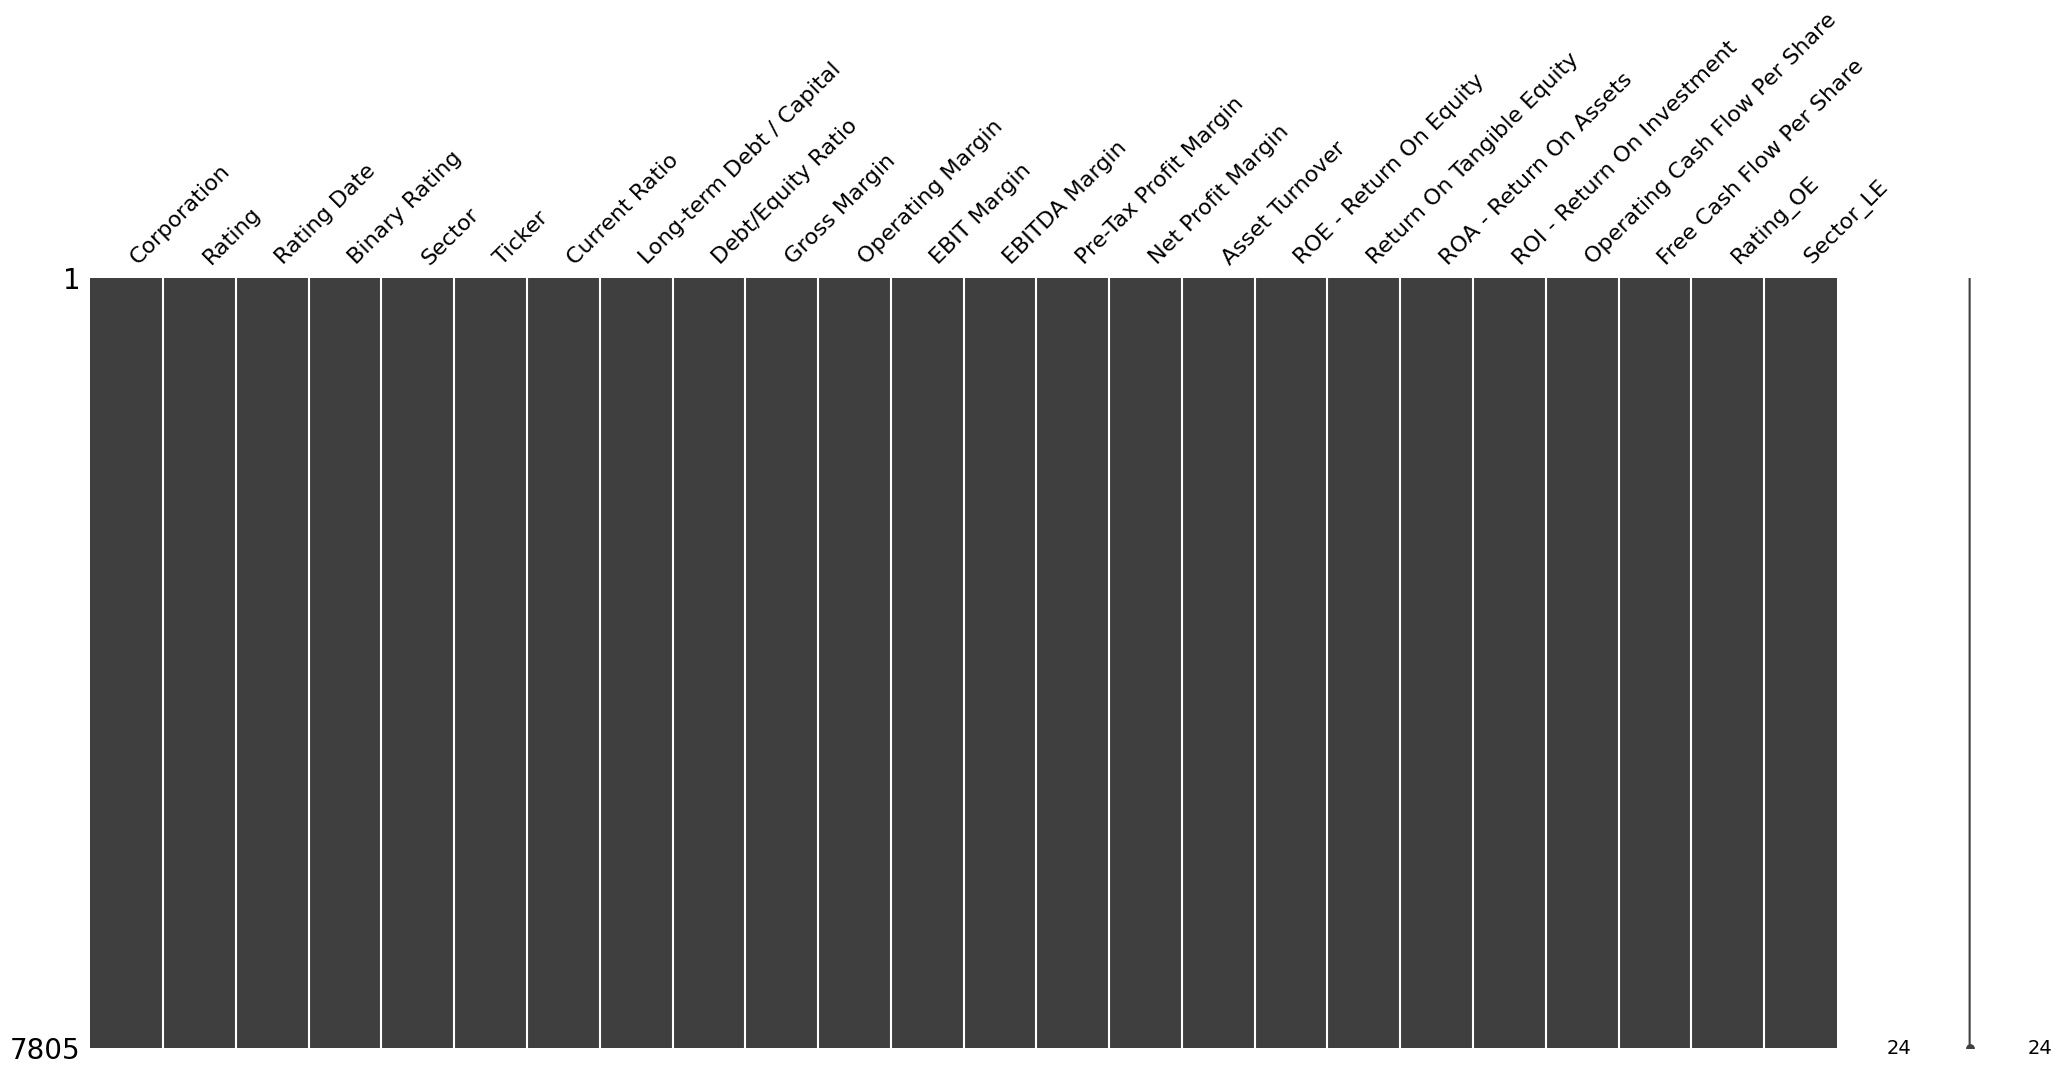

In [33]:
# Valores Faltantes.
msno.matrix(df)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Corporation                    7805 non-null   object 
 1   Rating                         7805 non-null   object 
 2   Rating Date                    7805 non-null   object 
 3   Binary Rating                  7805 non-null   int64  
 4   Sector                         7805 non-null   object 
 5   Ticker                         7805 non-null   object 
 6   Current Ratio                  7805 non-null   float64
 7   Long-term Debt / Capital       7805 non-null   float64
 8   Debt/Equity Ratio              7805 non-null   float64
 9   Gross Margin                   7805 non-null   float64
 10  Operating Margin               7805 non-null   float64
 11  EBIT Margin                    7805 non-null   float64
 12  EBITDA Margin                  7805 non-null   f

In [35]:
# Cambiamos Formato a Category para Identificar Variables Categóricas, ahorrar memoria y tener un procesamiento de datos más eficiente.
Columnas = ['Binary Rating', 'Rating_OE', 'Sector_LE']
def Cambio_Formato(df, Columnas):
    for i in Columnas:
        df[i] = df[i].astype('category')
    return df

df = Cambio_Formato(df, Columnas)

In [36]:
df['Corporation'] = df['Corporation'].astype('string')
df['Rating'] = df['Rating'].astype('string')
df['Sector'] = df['Sector'].astype('string')
df['Ticker'] = df['Ticker'].astype('string')

In [37]:
# Cambiamos el Formato de Fecha y Segmentamos por Intervalos.
# Año, Mes, Semana, Día de la Semana
df['Rating Date'] = pd.to_datetime(df['Rating Date'])
df['Year'] = df['Rating Date'].dt.year.astype('int64')
df['Month'] = df['Rating Date'].dt.month.astype('int64')
df['Week'] = df['Rating Date'].dt.isocalendar().week.astype('int64')
df['Day'] = df['Rating Date'].dt.day_of_week.astype('int64')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Corporation                    7805 non-null   string        
 1   Rating                         7805 non-null   string        
 2   Rating Date                    7805 non-null   datetime64[ns]
 3   Binary Rating                  7805 non-null   category      
 4   Sector                         7805 non-null   string        
 5   Ticker                         7805 non-null   string        
 6   Current Ratio                  7805 non-null   float64       
 7   Long-term Debt / Capital       7805 non-null   float64       
 8   Debt/Equity Ratio              7805 non-null   float64       
 9   Gross Margin                   7805 non-null   float64       
 10  Operating Margin               7805 non-null   float64       
 11  EBIT Margin      

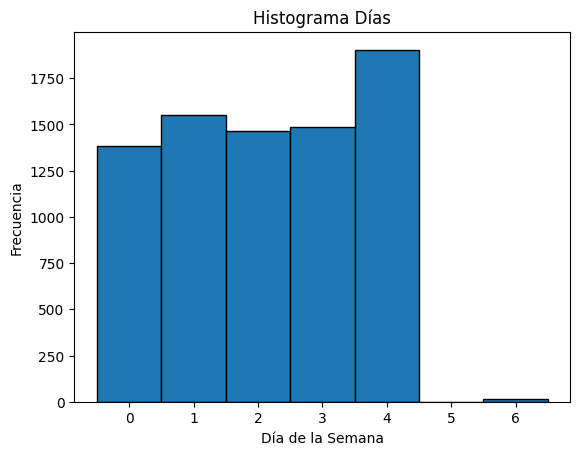

In [39]:
# Histograma Días.
plt.hist(df['Day'], bins=range(0,8), edgecolor='black', align='left')

# Etiquetas y título
plt.title('Histograma Días')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [40]:
#Días Lunes
df[df['Day']==0]['Rating Date']

6      2010-12-20
49     2011-10-31
50     2011-07-25
52     2011-10-31
54     2011-09-12
          ...    
7778   2016-01-11
7787   2016-02-01
7790   2016-08-15
7798   2016-09-26
7800   2016-02-22
Name: Rating Date, Length: 1383, dtype: datetime64[ns]

In [41]:
#Días Sábado
df[df['Day']==5]['Rating Date']

5948   2015-09-19
Name: Rating Date, dtype: datetime64[ns]

In [42]:
# Días Domingo
df[df['Day']==6]['Rating Date']

351    2011-11-13
1517   2013-03-17
2811   2013-12-08
2880   2014-07-27
3058   2014-10-05
3333   2014-11-23
4345   2014-12-14
4561   2014-10-26
4649   2014-07-27
5358   2015-01-25
5834   2015-12-20
6432   2015-06-28
6945   2016-03-20
7058   2016-01-31
7687   2016-05-08
Name: Rating Date, dtype: datetime64[ns]

Es poco probable que se haya realizado la calificación de una Agencia un día Domingo, cuando la bolsa de EEUU está cerrada.

In [43]:
# Reemplazamos Sábado por Viernes y Domingo por Lunes.
df['Day'].replace({5: 4, 6: 1}, inplace=True)

C:\Users\220890\AppData\Local\Temp\ipykernel_25424\2811778136.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





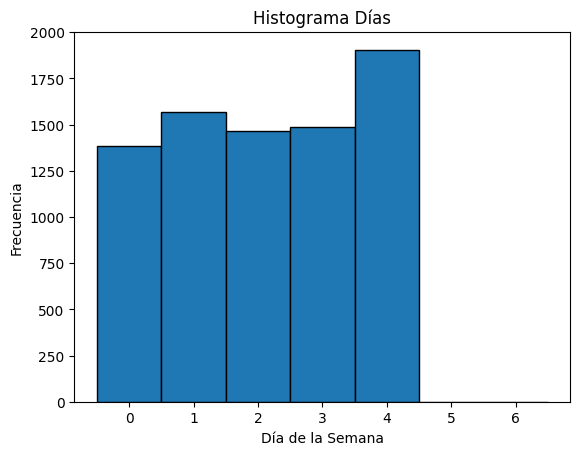

In [44]:
# Histograma Días.
plt.hist(df['Day'], bins=range(0,8), edgecolor='black', align='left')

# Etiquetas y título
plt.title('Histograma Días')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

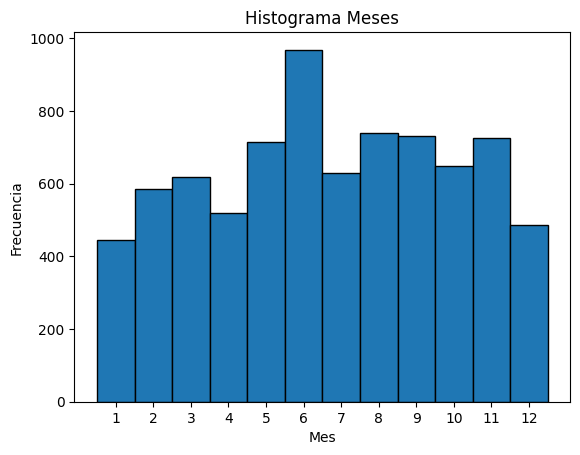

In [45]:
# Histograma Meses.
plt.hist(df['Month'], bins=range(1,14), edgecolor='black', align='left')

# Etiquetas y título
plt.title('Histograma Meses')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 13))

# Mostrar el gráfico
plt.show()

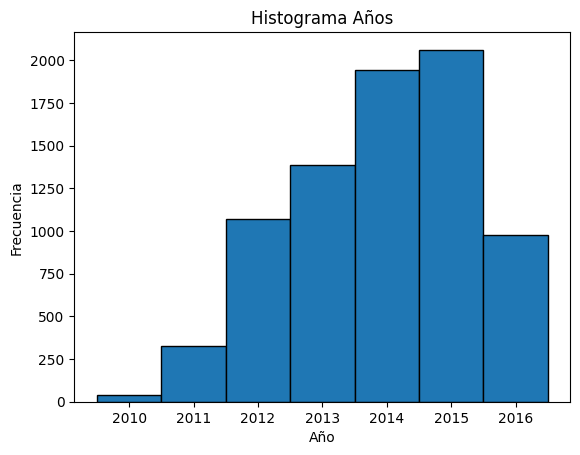

In [46]:
# Histograma Años.
plt.hist(df['Year'], bins=range(2010,2018), edgecolor='black', align='left')

# Etiquetas y título
plt.title('Histograma Años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [47]:
# Agrupamos la clasificación de una compañía para un mes y año en particular, para identificar si es que existe más de una clasificación en un mismo periodo contable.
df_grouped = df.groupby(['Year', 'Month', 'Corporation'])['Rating'].nunique()

In [48]:
df_grouped.describe().round(2)

count    7285.00
mean        1.02
std         0.13
min         1.00
25%         1.00
50%         1.00
75%         1.00
max         3.00
Name: Rating, dtype: float64

In [49]:
# Existen casos en los cuales tenemos 2 o 3 clasificaciones diferentes de una empresa para un mismo año, mes.
df_grouped.value_counts()

Rating
1    7156
2     127
3       2
Name: count, dtype: int64

In [50]:
# Agrupamos nuevamente, pero ahora considerando la fecha más antigua para un mismo mes y año, intentando tomar la fecha más cercana al fin del periodo contable. 
df = df.loc[df.groupby(['Year','Month','Corporation'])['Rating Date'].idxmax()]

In [51]:
# Se reduce el df de (7805, 28) a (7285, 28)
df.shape

(7285, 28)

In [52]:
# Valores Duplicados.
df.duplicated().sum()

0

In [53]:
df.describe().round(1)

,Rating Date,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,...,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Year,Month,Week,Day
count,7285,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,...,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0
mean,2014-06-02 21:31:09.430336256,1.9,0.5,0.2,42.5,11.5,11.5,20.0,8.6,6.0,...,15.1,20.0,4.6,7.0,0.5,0.1,2013.9,6.7,27.6,2.1
min,2010-04-06 00:00:00,0.2,-86.4,-1473.1,-87.7,-461.8,-461.8,-360.8,-476.0,-414.8,...,-11258.2,-14023.3,-226.4,-745.5,-91.3,-130.7,2010.0,1.0,1.0,0.0
25%,2013-07-22 00:00:00,1.1,0.3,0.4,22.5,6.1,6.1,11.1,4.0,2.6,...,6.0,-11.8,2.4,3.7,-0.4,-0.7,2013.0,4.0,17.0,1.0
50%,2014-07-22 00:00:00,1.5,0.4,0.8,39.6,12.1,12.1,18.3,9.7,6.9,...,12.5,10.6,4.7,7.4,0.2,0.1,2014.0,7.0,27.0,2.0
75%,2015-07-01 00:00:00,2.2,0.5,1.2,59.6,19.4,19.4,30.5,16.6,12.2,...,20.3,26.9,7.9,12.5,1.1,1.0,2015.0,9.0,39.0,3.0
max,2016-12-27 00:00:00,34.1,171.5,194.4,100.0,94.0,94.0,286.5,221.3,219.4,...,7038.5,9883.0,114.7,466.7,282.2,107.7,2016.0,12.0,53.0,4.0
std,NaN,1.9,2.7,34.4,23.7,25.2,25.2,24.3,27.7,24.0,...,233.1,455.4,9.3,25.0,6.2,7.4,1.4,3.2,14.0,1.4


In [54]:
df.describe(include='category')

,Binary Rating,Rating_OE,Sector_LE
count,7285,7285,7285
unique,2,7,11
top,1,4,2
freq,4749,1495,1268


In [55]:
df.describe(include='string')

,Corporation,Rating,Sector,Ticker
count,7285,7285,7285,7285
unique,1377,7,11,678
top,Chevron Corporation,Media Inferior,Consumer Staples,DTE
freq,20,1495,1268,40


Correlación Entre Variables

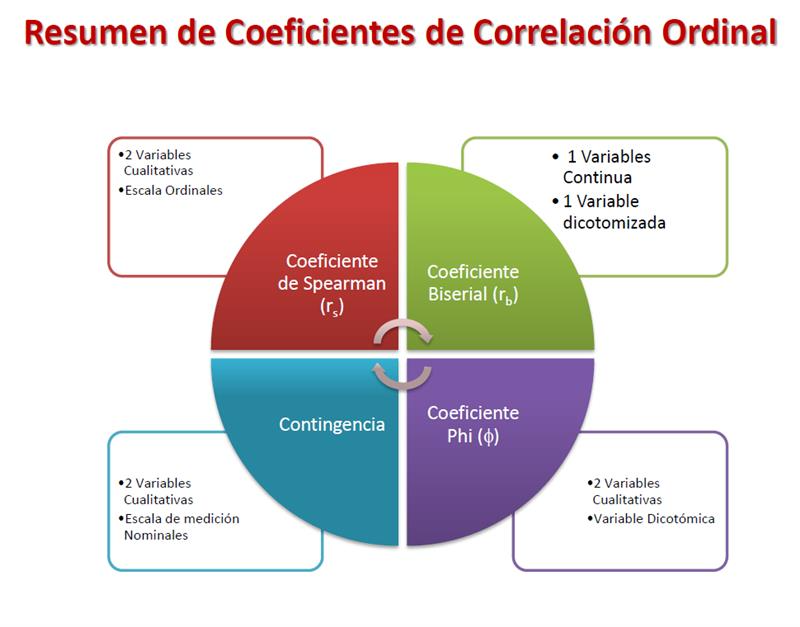

![Captura de pantalla 2024-08-05 121312.jpg](<attachment:Captura de pantalla 2024-08-05 121312.jpg>)
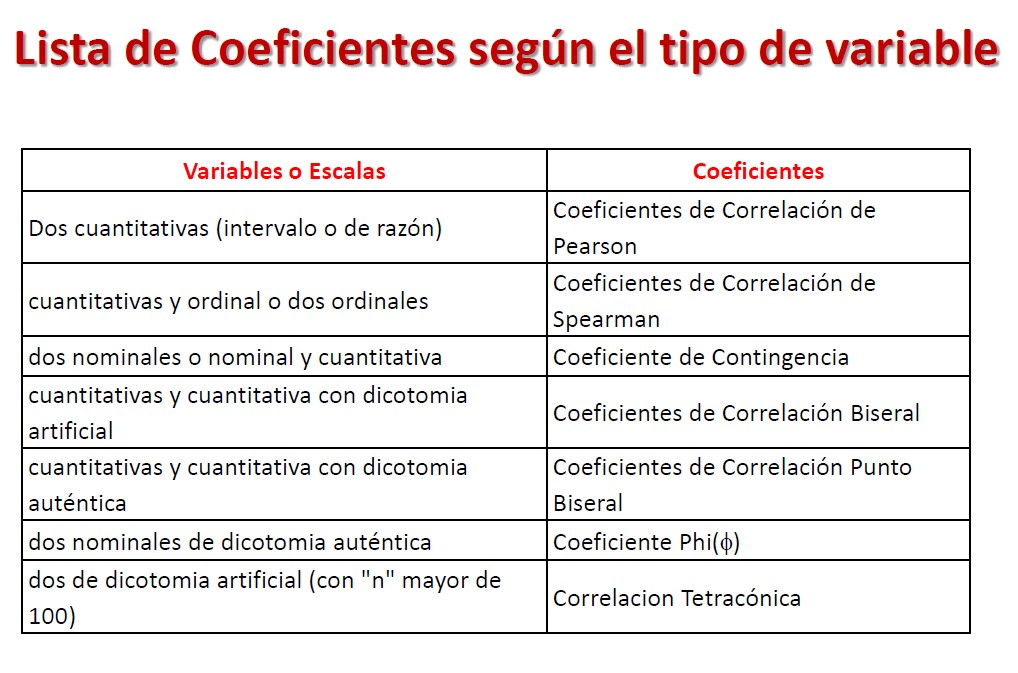

![Captura de pantalla 2024-08-05 121405.jpg](<attachment:Captura de pantalla 2024-08-05 121405.jpg>)
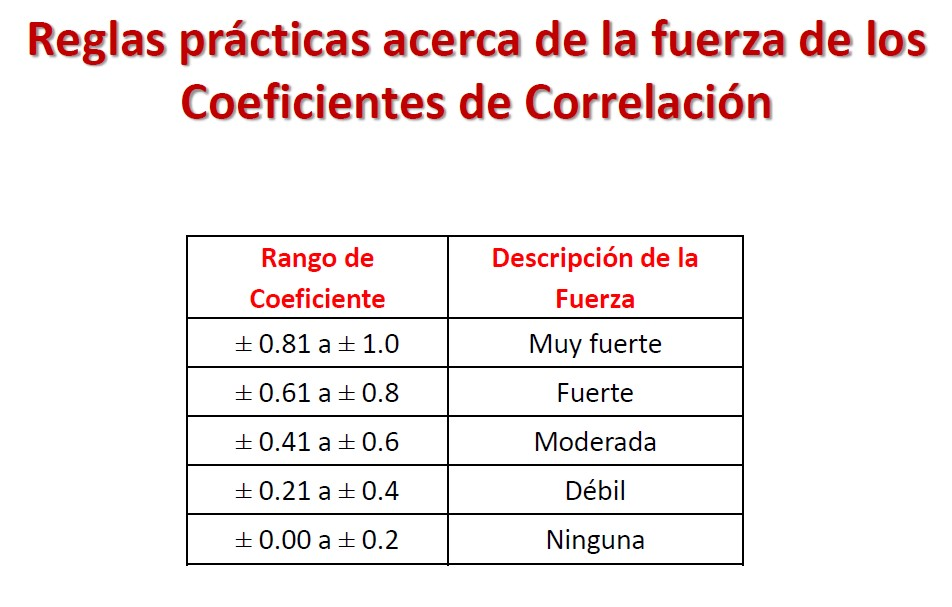

Ho: Hipótesis Nula.
Ha: Hipótesis Alternativa.
0,05: Nivel de Significancia Definido.

P-Value
p < 0,05 significa que la hipótesis nula es falsa
p > 0,05 que la hipótesis nula es verdadera

Un valor p pequeño (generalmente menor que 0.05) indica que la probabilidad de obtener una correlación tan fuerte o más fuerte que la observada bajo la hipótesis nula es baja. Por lo tanto, se considera que hay evidencia suficiente para rechazar la hipótesis nula y concluir que existe una correlación significativa entre las variables.

Por otro lado, un valor p grande (generalmente mayor que 0.05) indica que la probabilidad de obtener una correlación tan fuerte o más fuerte que la observada bajo la hipótesis nula es alta. En este caso, no hay suficiente evidencia para rechazar la hipótesis nula y se concluye que no hay una correlación significativa entre las variables.

Coeficiente Biserial
Ho: No existe correlación entre una variable dicotómica y una variable métrica.
Ha: Existe correlación entre una variable dicotómica y una variable métrica.

Coeficiente de Spearman
Ho: No hay correlación entre las variables
Ha: Si hay correlación entre las variables

Coeficiente de Pearson
Ho: No hay correlación lineal entre las variables
Ha: Si hay correlación lineal entre las variables

In [56]:
# Coeficiente Biserial
# Correlación Clasificación Binaria con Clasificación Ordinal.

variable_dicotomica = df['Binary Rating']
variable_numerica_continua = df['Rating_OE']

# Calcular el coeficiente de correlación de punto biserial
coeficiente, p_value = stats.pointbiserialr(variable_dicotomica, variable_numerica_continua)

print("Coeficiente de correlación de punto biserial:", coeficiente)
print("P-valor:", p_value)

Coeficiente de correlación de punto biserial: 0.8406313971695824
P-valor: 0.0


Conclusión: Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables.

In [57]:
print((df.groupby(['Binary Rating', 'Rating_OE'], observed=True)).size())

Binary Rating  Rating_OE
0              1             494
               2            1095
               3             947
1              4            1495
               5            1450
               6            1236
               7             568
dtype: int64


Esto queda evidenciado al analizar la relación directa entre la clasificación Dicotómica 0: No Inventir con los 3 primeros Valores de la Clasificación Ordinal 1,2,3 ('Especulativa', 'Altamente Especulativa', 'Riesgo Sustancial') y la clasificación Dicotómica 1: Invertir con los Valores más altos de la Clasificaicón Ordinal 4,5,6,7 ('Alta', 'Media Superior', 'Media', 'Media Inferior').

RATIOS DE LIQUIDEZ.

In [58]:
# Coeficiente de Spearman 
# Correlación Ratio de Liquidez con Variable Objetivo.

coeficiente, p_value = stats.spearmanr(df['Current Ratio'], df['Rating_OE'])
print("Coeficiente de Spearman:", coeficiente)
print("P-valor:", p_value)

Coeficiente de Spearman: -0.127931266341371
P-valor: 5.793364343672758e-28


Conclusión: Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Current Ratio' para posteriores Análisis.

RATIOS DE RENTABILIDAD.

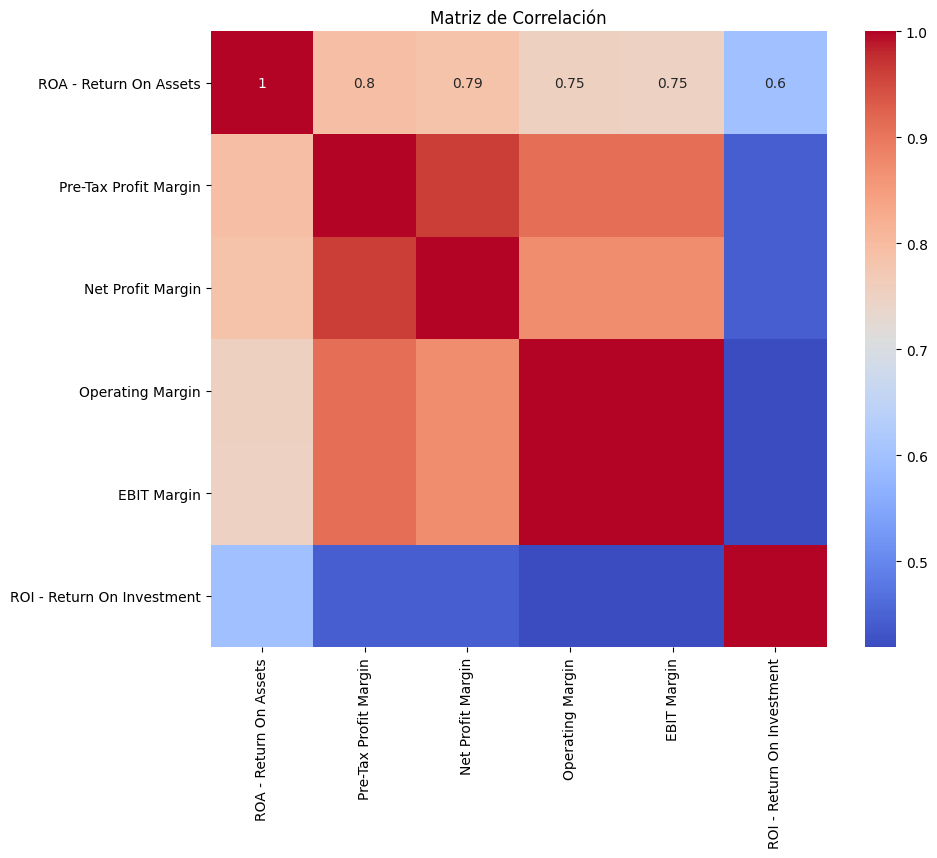

In [59]:
# Coeficiente de Pearson.
# Correlación entre Ratios de Rentabilidad.

df_rentabilidad = df[['ROA - Return On Assets', 'Pre-Tax Profit Margin', 'Net Profit Margin', 'Operating Margin', 'EBIT Margin', 'ROI - Return On Investment']]
matriz_corr = df_rentabilidad.corr()

# Gráfico de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

Conclusión 1: Existe un alto grado de Correlación Lineal entre las variables 'ROA - Return On Assets', 'Pre-Tax Profit Margin', 'Net Profit Margin', 'Operating Margin', 'EBIT Margin', por lo cual se podría discernir de alguna de ellas si es que estas explicasen el mismo fenómeno y si es que tuvieran baja correlación con la Variable Objetivo.

Conclusión 2: La Variable 'ROI - Return On Investment' no posee un grado de correlación alto con ninguna de los otros Ratios de Rentabilidad, por lo cual la información de esta se debe conservar para su posterior análisis, siempre y cuando tenga un grado de correlación alto con la Variable Objetivo. 

In [60]:
# Coeficiente de Spearman 
# Correlación Ratios de Rentabilidad con Variable Objetivo.
for column in df_rentabilidad:
    coeficiente, p_value = stats.spearmanr(df[column], df['Rating_OE'])
    print(f'{column}: Coeficiente de Spearman: {coeficiente}, P-Value: {p_value}')

ROA - Return On Assets: Coeficiente de Spearman: 0.4189843501456261, P-Value: 1.1607220829029526e-307
Pre-Tax Profit Margin: Coeficiente de Spearman: 0.45771717976608445, P-Value: 0.0
Net Profit Margin: Coeficiente de Spearman: 0.43362358122591177, P-Value: 0.0
Operating Margin: Coeficiente de Spearman: 0.3608064979193858, P-Value: 6.963107384684966e-223
EBIT Margin: Coeficiente de Spearman: 0.36232855641360434, P-Value: 6.894919178192096e-225
ROI - Return On Investment: Coeficiente de Spearman: 0.44578334699634364, P-Value: 0.0


Conclusión: 
1. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'ROA - Return On Assets' para posteriores Análisis.
2. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Pre-Tax Profit Margin' para posteriores Análisis.
3. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Net Profit Margin' para posteriores Análisis.
4. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Net Profit Margin' para posteriores Análisis.
5. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Net Profit Margin' para posteriores Análisis.
6. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Net Profit Margin' para posteriores Análisis.

RATIOS DE DEUDA.

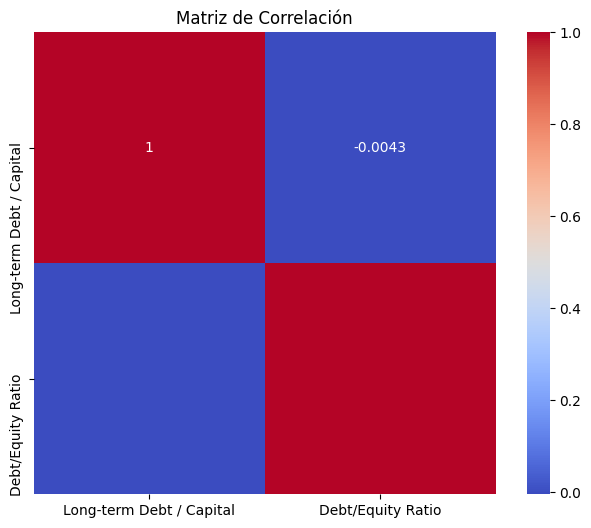

In [61]:
# Coeficiente de Pearson.
# Correlación entre Ratios de Deuda.
df_deuda = df[['Long-term Debt / Capital','Debt/Equity Ratio']]
matriz_corr = df_deuda.corr()

# Gráfico de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

Conclusión: Los Ratios de Deuda no poseen un grado de Correlación Lineal alto entre ellos, por lo cual la información de estas variables se debe conservar para su posterior análisis, siempre y cuando estas tengan un grado de correlación alto con la Variable Objetivo. 

In [62]:
# Coeficiente de Spearman 
# Correlación Ratios de Deuda con Variable Objetivo.
for column in df_deuda:
    coeficiente, p_value = stats.spearmanr(df[column], df['Rating_OE'])
    print(f'{column}: Coeficiente de Spearman: {coeficiente}, P-Value: {p_value}')

Long-term Debt / Capital: Coeficiente de Spearman: -0.36614004720771703, P-Value: 5.905327671656042e-230
Debt/Equity Ratio: Coeficiente de Spearman: -0.23312338750791736, P-Value: 1.6995451517624205e-90


Conclusión: 
1. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Long-term Debt / Capital' para posteriores Análisis.
2. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Debt/Equity Ratio' para posteriores Análisis.

RATIOS DE DESEMPEÑO OPERACIONAL.

In [63]:
# Coeficiente de Spearman 
# Correlación Ratio de Desempeño Operacional con Variable Objetivo.

coeficiente, p_value = stats.spearmanr(df['Asset Turnover'], df['Rating_OE'])
print("Coeficiente de Spearman:", coeficiente)
print("P-valor:", p_value)

Coeficiente de Spearman: -0.012927456822223406
P-valor: 0.26992131196425595


RATIOS DE FLUJO DE CAJA.

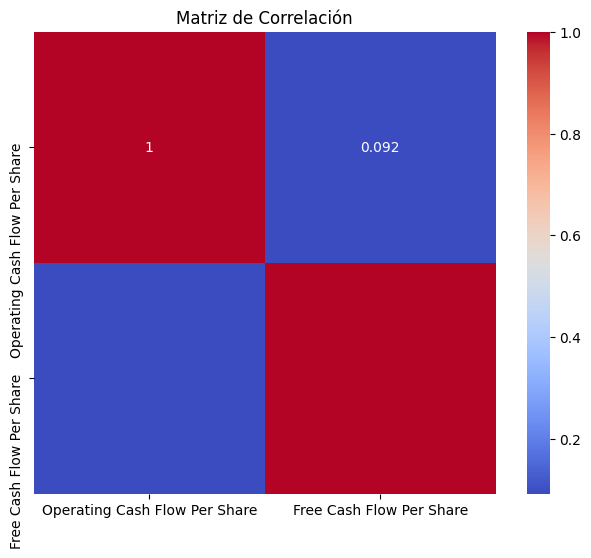

In [64]:
# Coeficiente de Pearson.
# Correlación entre Ratios de Flujo de Caja.
df_flujo_caja = df[['Operating Cash Flow Per Share','Free Cash Flow Per Share']]
matriz_corr = df_flujo_caja.corr()

# Gráfico de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

Conclusión: Los Ratios de Flujo de Caja no poseen un grado de Correlación Lineal alto entre ellos, por lo cual la información de estas variables se debe conservar para su posterior análisis, siempre y cuando estas tengan un grado de correlación alto con la Variable Objetivo. 

In [65]:
# Coeficiente de Spearman 
# Correlación Ratios de Flujo de Caja con Variable Objetivo.
for column in df_flujo_caja:
    coeficiente, p_value = stats.spearmanr(df[column], df['Rating_OE'])
    print(f'{column}: Coeficiente de Spearman: {coeficiente}, P-Value: {p_value}')

Operating Cash Flow Per Share: Coeficiente de Spearman: 0.05648877672960009, P-Value: 1.4037816291405448e-06
Free Cash Flow Per Share: Coeficiente de Spearman: 0.05711473501621771, P-Value: 1.0715910945856728e-06


Conclusión: 
1. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Operating Cash Flow Per Share' para posteriores Análisis.
2. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Operating Cash Flow Per Share' para posteriores Análisis.

VIF - Factor de Inflación de la Varianza.
https://profesordata.com/2020/08/22/metodos-de-seleccion-de-variables-el-factor-de-inflacion-de-la-varianza/

VIF igual a 1: Un VIF de 1 indica que no hay colinealidad entre la variable predictora y las demás variables. Esto significa que la variable no está correlacionada con ninguna otra variable en el modelo.

VIF entre 1 y 5: Un VIF en este rango generalmente se considera aceptable y sugiere una colinealidad leve o moderada entre la variable predictora y otras variables. No es motivo de preocupación grave, pero se debe tener en cuenta al interpretar los coeficientes de regresión.

VIF mayor a 5: Un VIF mayor a 5 indica una colinealidad sustancial entre la variable predictora y al menos una de las otras variables. Esto puede sugerir que la variable está  muy correlacionada con otras variables y puede dificultar la interpretación de los coeficientes de regresión.

VIF muy alto: En casos donde el VIF es extremadamente alto (por ejemplo, superior a 10 o 20), se considera que la colinealidad es muy fuerte. Esto indica que la variable está altamente correlacionada con otras variables y puede afectar significativamente las estimaciones de los coeficientes de regresión.

In [66]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

df_ratios = df[['Current Ratio', 'ROA - Return On Assets', 'Pre-Tax Profit Margin', 
                'Net Profit Margin', 'Operating Margin', 'EBIT Margin', 'ROI - Return On Investment', 
                'Long-term Debt / Capital','Debt/Equity Ratio', 'Asset Turnover', 'Operating Cash Flow Per Share','Free Cash Flow Per Share']]

def variance_inflation_factors(df_ratios):
    exog_df = add_constant(df_ratios)
    vifs = pd.Series(
        [1 / (1. - OLS(df_ratios[col].values,
                       df_ratios.loc[:, df_ratios.columns != col].values).fit().rsquared)
         for col in df_ratios],
        index=df_ratios.columns,
        name='VIF'
    )
    return vifs

variance_inflation_factors(df_ratios)

Current Ratio                       1.473664
ROA - Return On Assets              5.577553
Pre-Tax Profit Margin              22.198173
Net Profit Margin                  14.994087
Operating Margin                 2274.930939
EBIT Margin                      2273.493894
ROI - Return On Investment          3.413175
Long-term Debt / Capital            2.058374
Debt/Equity Ratio                   1.000484
Asset Turnover                      1.637340
Operating Cash Flow Per Share       1.076627
Free Cash Flow Per Share            1.025059
Name: VIF, dtype: float64

SELECCIÓN DE VARIABLES RATIOS DE LIQUIDEZ.
1. Se conserva la variable 'Current Ratio' debido a su alto grado de correlación con la Variable Objetivo y a su bajo grado de Colinealidad entre Variables Predictoras.

SELECIÓN DE VARIABLES RATIOS DE RENTABILIDAD.
1. Se descarta la variable 'ROA - Return On Assets' debido a su menor grado de correlación con la Variable Objetivo y a su alto grado de Colinealidad entre Variables Predictoras.
2. Se descarta la variable 'Pre-Tax Profit Margin' aunque tenga un alto grado de correlación con la Variable Objetivo debido a su alto grado de Colinealidad entre Variables Predictoras.
3. Se descarta la variable 'Net Profit Margin' aunque tenga un alto grado de correlación con la Variable Objetivo debido a su alto grado de Colinealidad entre Variables Predictoras.
4. Se descarta la variable 'Operating Margin' debido a su menor grado de correlación con la Variable Objetivo y a su alto grado de Colinealidad entre Variables Predictoras.
5. Se descarta la variable 'EBIT Margin' debido a su menor grado de correlación con la Variable Objetivo y a su alto grado de Colinealidad entre Variables Predictoras.
6. Se conserva la variable 'ROI - Return On Investment' debido a su alto grado de correlación con la Variable Objetivo y a su nivel medio de Colinealidad entre Variables Predictoras.

SELECCIÓN DE VARIABLES RATIOS DE DEUDA.
1. Se conserva la variable 'Long-term Debt / Capital' debido a su mayor grado de correlación con la Variable Objetivo y a su nivel medio de Colinealidad entre Variables Predictoras.
2. Se descarta la variable 'Debt/Equity Ratio' debido a su menor grado de correlación con la Variable Objetivo aunque posea un bajo grado de Colinealidad entre Variables Predictoras.

SELECCIÓN DE VARIABLES DESEMPEÑO OPERACIONAL.
1. Se descarta la variable 'Asset Turnover' debido a su bajo grado de correlación con la Variable Objetivo aunque posea un bajo grado de Colinealidad entre Variables Predictoras.

SELECCIÓN DE VARIABLES RATIOS DE FLUJO DE CAJA.
1. Se conserva la variable 'Free Cash Flow Per Share' debido a su mayor grado de correlación con la Variable Objetivo y a su bajo grado de Colinealidad entre Variables Predictoras.
2. Se descarta la variable 'Operating Cash Flow Per Share' debido a su menor grado de correlación con la Variable Objetivo aunque posea un bajo grado de Colinealidad entre Variables Predictoras.

In [67]:
df.drop(columns=['ROA - Return On Assets', 'Pre-Tax Profit Margin', 'Net Profit Margin', 'Operating Margin', 'EBIT Margin', 'Debt/Equity Ratio', 'Asset Turnover', 'Operating Cash Flow Per Share', 'Rating Date'], inplace=True)
df.head(5)

,Corporation,Rating,Binary Rating,Sector,Ticker,Current Ratio,Long-term Debt / Capital,Gross Margin,EBITDA Margin,ROE - Return On Equity,Return On Tangible Equity,ROI - Return On Investment,Free Cash Flow Per Share,Rating_OE,Sector_LE,Year,Month,Week,Day
33,Southern Copper Corp.,Media Inferior,1,Other,SCCO,2.9659,0.2460,50.0351,47.0963,24.0025,24.7254,18.0982,0.6584,4,9,2010,4,14,1
8,Compass Group PLC,Media,1,Information Technology,COMP,1.0668,0.3398,64.6665,43.6578,21.2038,18.3188,11.8033,0.9432,5,7,2010,5,21,4
3,California Water Service Co.,Alta,1,Utilities,CWT,0.8358,0.4708,64.5096,27.9377,9.6412,9.7015,5.1018,-0.8999,7,10,2010,6,26,1
16,Fresh Del Monte Produce Inc.,Altamente Especulativa,0,Consumer Staples,FDP,2.5430,0.1589,8.8891,6.7269,8.5300,11.2424,7.1744,2.9936,2,2,2010,6,22,1
29,Northwest Natural Gas Co.,Media,1,Utilities,NWN,0.8361,0.4769,39.6503,21.8749,11.3803,11.3803,5.9535,3.9589,5,10,2010,6,24,2


In [68]:
df.shape

(7285, 19)

4. Medidas de Tendencia Central

In [69]:
df_var_selecc= df[['Current Ratio', 'ROI - Return On Investment', 'Long-term Debt / Capital', 'Free Cash Flow Per Share']]

In [70]:
df_var_selecc.describe().round(1)

,Current Ratio,ROI - Return On Investment,Long-term Debt / Capital,Free Cash Flow Per Share
count,7285.0,7285.0,7285.0,7285.0
mean,1.9,7.0,0.5,0.1
std,1.9,25.0,2.7,7.4
min,0.2,-745.5,-86.4,-130.7
25%,1.1,3.7,0.3,-0.7
50%,1.5,7.4,0.4,0.1
75%,2.2,12.5,0.5,1.0
max,34.1,466.7,171.5,107.7


Medidas de Dispersión

In [71]:
# Varianza
variance = np.var(df_var_selecc)
print(variance)

Current Ratio                   3.607371
ROI - Return On Investment    624.820891
Long-term Debt / Capital        7.395054
Free Cash Flow Per Share       54.440447
dtype: float64


c:\Users\220890\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning:

The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [72]:
# Desviación Estándar
std_dev = np.std(df_var_selecc)
print(std_dev)

Current Ratio                  1.899308
ROI - Return On Investment    24.996418
Long-term Debt / Capital       2.719385
Free Cash Flow Per Share       7.378377
dtype: float64


c:\Users\220890\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning:

The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [73]:
# Coeficiente de Variación
for column in df_var_selecc.columns:
   coef_var = stats.variation(df_var_selecc[column])*100
   print(f'Coeficiente de Variación de {column}: {coef_var}')

Coeficiente de Variación de Current Ratio: 98.87328749424908
Coeficiente de Variación de ROI - Return On Investment: 355.5598062824857
Coeficiente de Variación de Long-term Debt / Capital: 602.8450714969538
Coeficiente de Variación de Free Cash Flow Per Share: 6440.922598150037


In [74]:
# IQR
for column in df_var_selecc.columns:
   IQR = stats.iqr(df_var_selecc[column]) 
   print(f'IQR de {column}: {IQR}')

IQR de Current Ratio: 1.0901000000000003
IQR de ROI - Return On Investment: 8.8587
IQR de Long-term Debt / Capital: 0.25140000000000007
IQR de Free Cash Flow Per Share: 1.7054


In [75]:
# Error Estándar
for column in df_var_selecc.columns:
   SE = stats.sem(df_var_selecc[column])
   print(f'Error Estandar de {column}: {SE}')

Error Estandar de Current Ratio: 0.022254119029723494
Error Estandar de ROI - Return On Investment: 0.292882081512362
Error Estandar de Long-term Debt / Capital: 0.03186292907057499
Error Estandar de Free Cash Flow Per Share: 0.08645216492122465


Medidas de Asimetría y Curtosis

In [76]:
# Coeficiente de Asimetía
for column in df_var_selecc.columns:
    SK = stats.skew(df_var_selecc[column])
    print(f'Coef de Asimetría de {column}: {SK}') 

Coef de Asimetría de Current Ratio: 7.301547657476572
Coef de Asimetría de ROI - Return On Investment: -14.703097946605935
Coef de Asimetría de Long-term Debt / Capital: 20.902377386398094
Coef de Asimetría de Free Cash Flow Per Share: -2.856754622967281


In [77]:
# Curtosis
for column in df_var_selecc.columns:
   KUR = stats.kurtosis(df_var_selecc[column])
   print(f'Kurstosis de {column}: {KUR}') 

Kurstosis de Current Ratio: 79.17258729914595
Kurstosis de ROI - Return On Investment: 437.157159592925
Kurstosis de Long-term Debt / Capital: 2574.2678067416673
Kurstosis de Free Cash Flow Per Share: 182.0120231178187


GRAFICOS PARA VISUALIZAR ASIMETRÍA Y CURTOSIS.

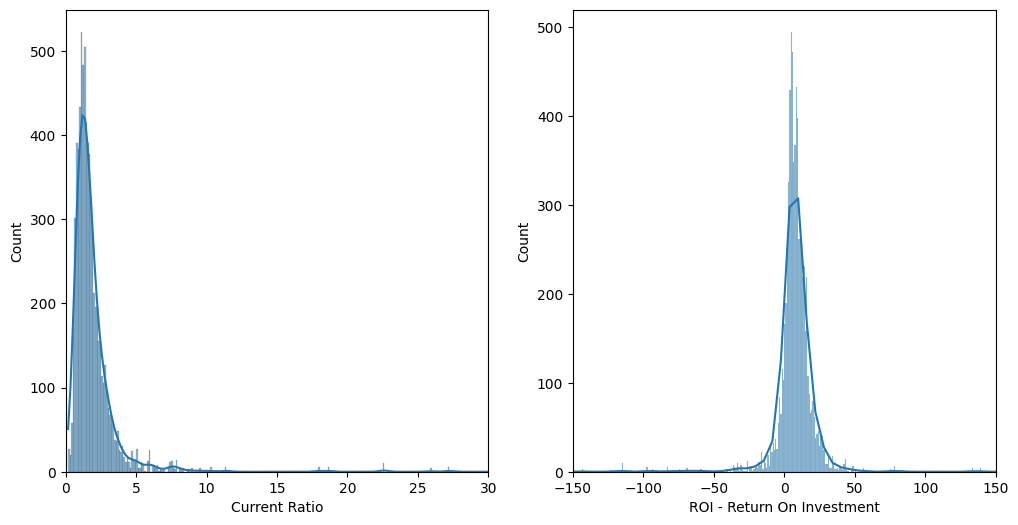

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Current Ratio
sns.histplot(df, x='Current Ratio', kde=True, ax=ax1)
ax1.set_xlim([0, 30])

# Gráfico 2: ROI - Return On Investment
sns.histplot(df, x='ROI - Return On Investment', kde=True, ax=ax2)
ax2.set_xlim([-150, 150])

plt.show()

Conclusión 1:
1. Current Ratio: Distribución Simétrica con Custosis Positiva y Asimetría Positiva (Hacia la Derecha).
2. ROI - Return On Investment: Distribución Simétrica con Curtosis Positiva y sin Asimetrías evidentes. 

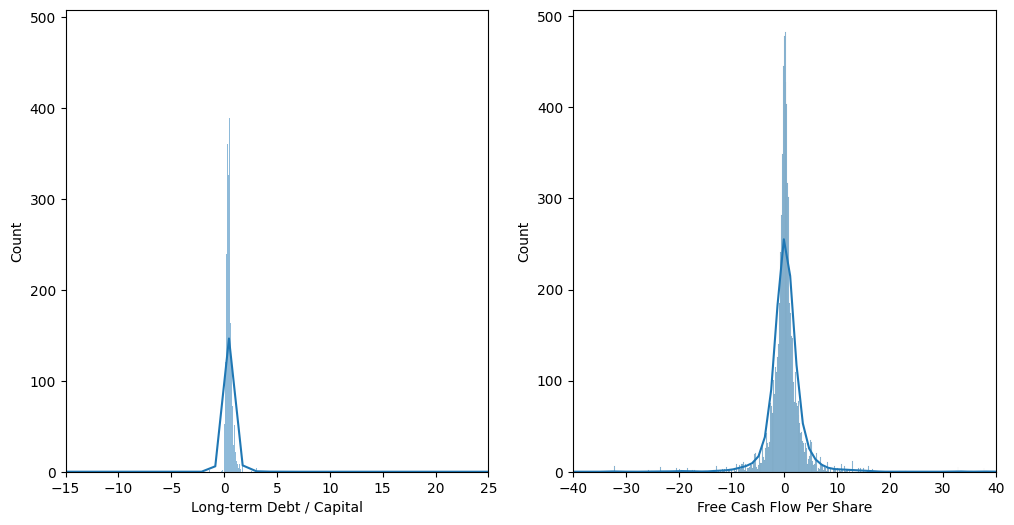

In [79]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 3: Long-term Debt / Capital
sns.histplot(df, x='Long-term Debt / Capital', kde=True, ax=ax3)
ax3.set_xlim([-15,25])

# Gráfico 4: Free Cash Flow Per Share
sns.histplot(df, x='Free Cash Flow Per Share', kde=True, ax=ax4)
ax4.set_xlim([-40,40])

plt.show()

Conclusión 2:
1. Long-term Debt / Capital: Distribución Asimétricca con Custosis Positiva muy alta y Asimetría Positiva (Hacia la Derecha).
2. Free Cash Flow Per Share: Distribución Simétrica con Curtosis Positiva y sin Asimetrías evidentes. 

Tests de Normalidad.

In [80]:
# Test de Shapiro
nivel_significancia = 0.05

for column in df_var_selecc.columns:
    p_value = stats.shapiro(df_var_selecc[column])[0]  # Obtiene el primer valor de la tupla
    print(f'P Value de {column}:', p_value)
    if p_value < nivel_significancia:
        print(f'Los datos de {column} NO siguen una distribución normal.')
    else:
        print(f'Los datos de {column} siguen una distribución normal.')

P Value de Current Ratio: 0.49128232549654094
Los datos de Current Ratio siguen una distribución normal.
P Value de ROI - Return On Investment: 0.3095762296101294
Los datos de ROI - Return On Investment siguen una distribución normal.
P Value de Long-term Debt / Capital: 0.037198424915057315
Los datos de Long-term Debt / Capital NO siguen una distribución normal.
P Value de Free Cash Flow Per Share: 0.2988703215934564
Los datos de Free Cash Flow Per Share siguen una distribución normal.


c:\Users\220890\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7285.



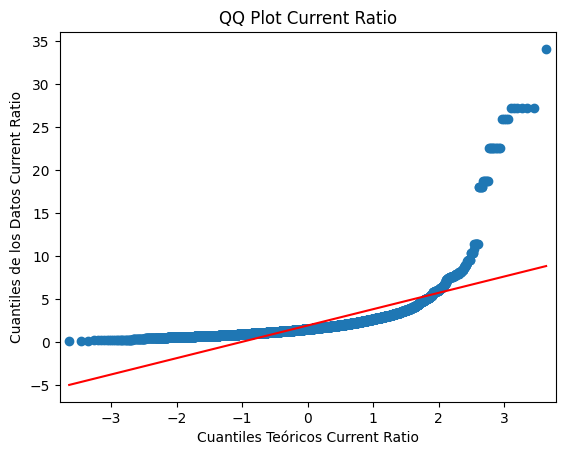

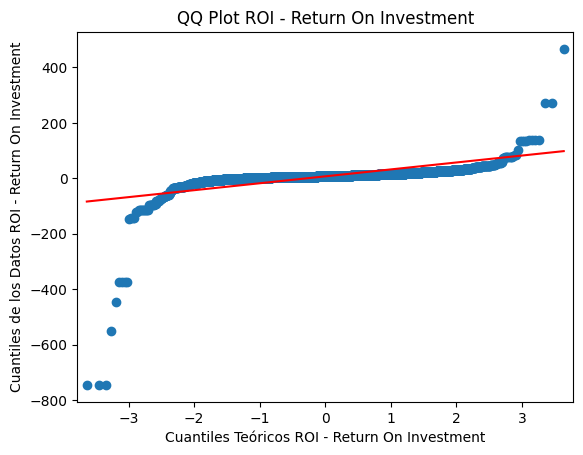

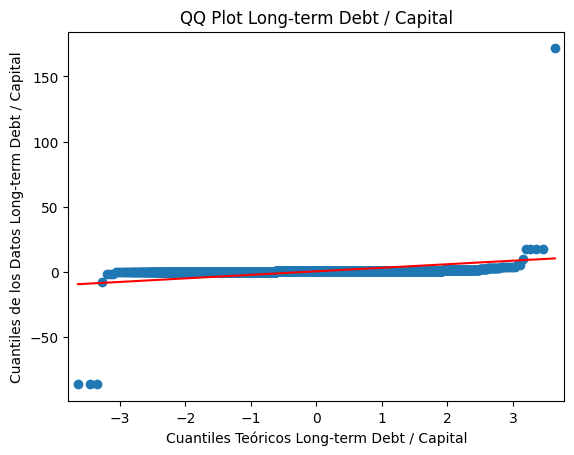

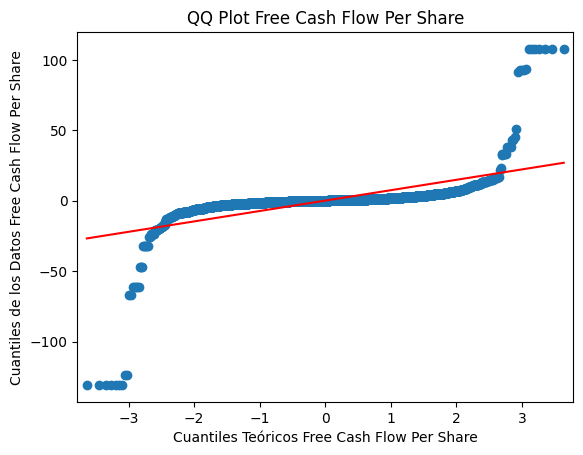

In [81]:
# QQ Plot
for column in df_var_selecc.columns:
   sm.qqplot(df_var_selecc[column], line='s')
   plt.xlabel(f'Cuantiles Teóricos {column}')
   plt.ylabel(f'Cuantiles de los Datos {column}')
   plt.title(f'QQ Plot {column}')
   plt.show()

Contrastando los Resultados de los Tests y Analizando los Gráficos de Histograma, se concluye lo siguiente:
1. Current Ratio: Los Datos poseen una Distribución Normal.
2. ROI - Return On Investment: Los Datos poseen una Distribución Normal.
3. Long-term Debt / Capital: Los Datos NO poseen una Distribución Normal.
4. Free Cash Flow Per Share: Los Datos poseen una Distribución Normal.

5.2 Valores Atípicos (Outliers)
https://repository.javeriana.edu.co/bitstream/handle/10554/10347/MorenoCastellanosJuanGabriel2012.pdf

(0.0, 35.0)

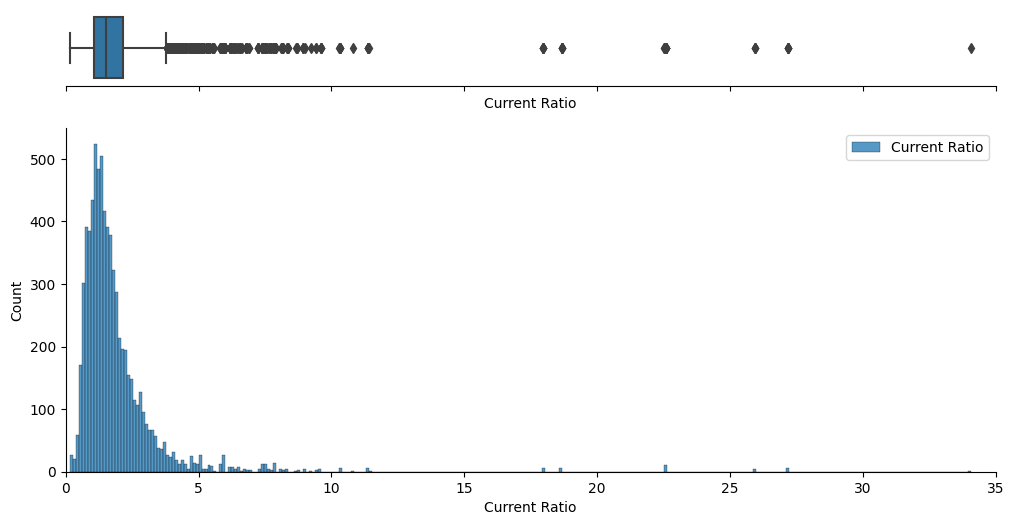

In [82]:
# Box Plot 1: Current Ratio
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['Current Ratio'], ax=ax_box, orient="h") 
sns.histplot(df['Current Ratio'], ax=ax_hist, label='Current Ratio')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
ax_hist.set_xlim(0,35)

Se identifican Outliers Leves y Extremos sobre el Tercer Cuartil (Q3).

(-200.0, 200.0)

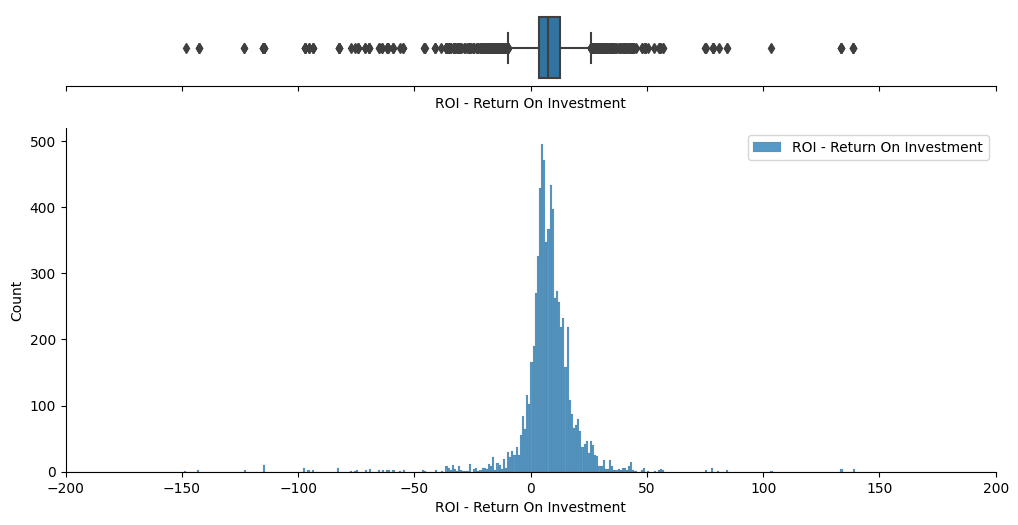

In [83]:
# Box Plot 2: ROI - Return On Investment
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['ROI - Return On Investment'], ax=ax_box, orient="h") 
sns.histplot(df['ROI - Return On Investment'], ax=ax_hist, label='ROI - Return On Investment')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
ax_hist.set_xlim(-200,200)

Se identifican Outliers Leves y Extremos bajo el primer (Q1) y sobre el Tercer Cuartil (Q3).

(-5.0, 5.0)

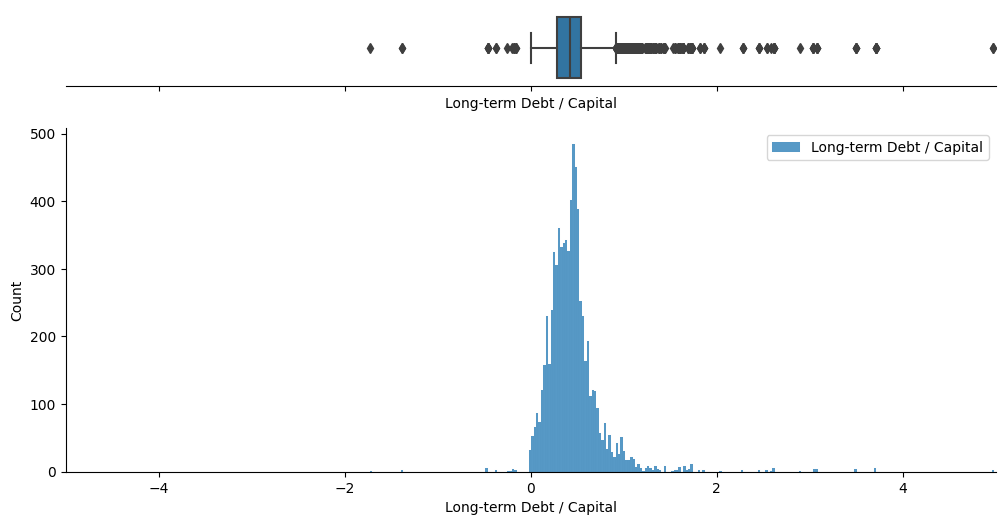

In [84]:
# Box Plot 3: Long-term Debt / Capital
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['Long-term Debt / Capital'], ax=ax_box, orient="h") 
sns.histplot(df['Long-term Debt / Capital'], ax=ax_hist, label='Long-term Debt / Capital')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
ax_hist.set_xlim(-5,5)

Se identifican Outliers Leves bajo el Primer Cuartil (Q1) y Outliers Leves y Extremos sobre el Tercer Cuartil (Q3).

(-50.0, 50.0)

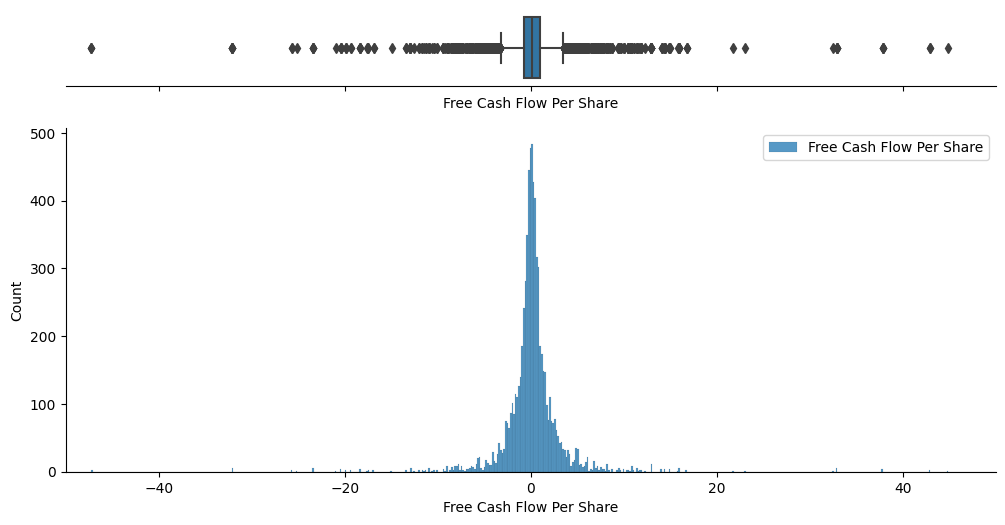

In [85]:
# Box Plot 4: Free Cash Flow Per Share
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['Free Cash Flow Per Share'], ax=ax_box, orient="h") 
sns.histplot(df['Free Cash Flow Per Share'], ax=ax_hist, label='Free Cash Flow Per Share')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
ax_hist.set_xlim(-50,50)

Se identifican Outliers Leves y Extremos bajo el Primer Cuartil (Q1) y Outliers Leves y Extremos sobre el Tercer Cuartil (Q3).

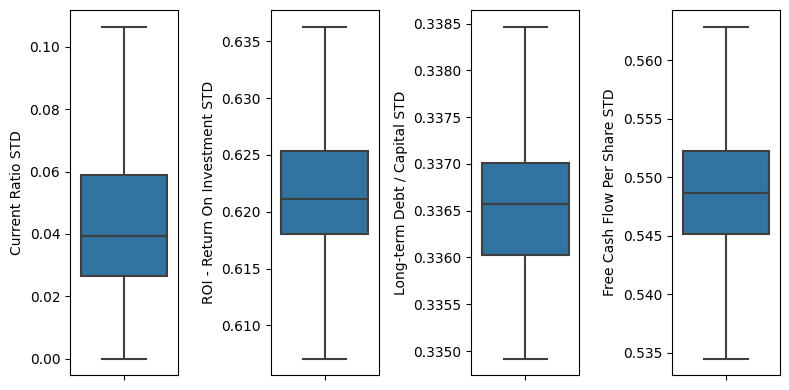

In [86]:
# Box Plot 5
# Estandarizamos las variables para no desvirtuar el gráfico, considerando los diferentes órdenes de magnitud.
# Dejamos los valores atípicos fuera del gráfico para mejorar la visualización.

from sklearn.preprocessing import MinMaxScaler

df['Current Ratio STD'] = df['Current Ratio']
df['ROI - Return On Investment STD'] = df['ROI - Return On Investment']
df['Long-term Debt / Capital STD'] = df['Long-term Debt / Capital']
df['Free Cash Flow Per Share STD'] = df['Free Cash Flow Per Share']

variables = ['Current Ratio STD', 'ROI - Return On Investment STD', 'Long-term Debt / Capital STD', 'Free Cash Flow Per Share STD']

scaler = MinMaxScaler()
df[variables] = scaler.fit_transform(df[variables])

fig, axes = plt.subplots(1, len(variables), figsize=(8,4))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax, showfliers=False)
plt.tight_layout()
plt.show()

Ratios Financieros por Industria https://www.cubesoftware.com/blog/financial-ratios

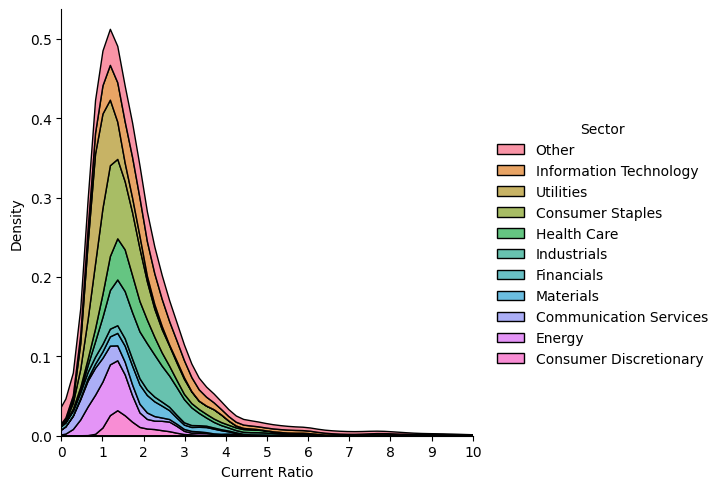

In [87]:
sns.displot(df, x='Current Ratio', hue='Sector', kind="kde", multiple='stack')
plt.xlim(0,10)
plt.xticks(range(0, 11))
plt.show()


Rangos de Current Ratio: Fluctuan entre 0 y 4 generalmente. Valores mayores a 4 podrían ser considerados como valores atípicos, dependiendo de las circumstancias, por lo cual, deben ser evaluados en mayor profundidad.

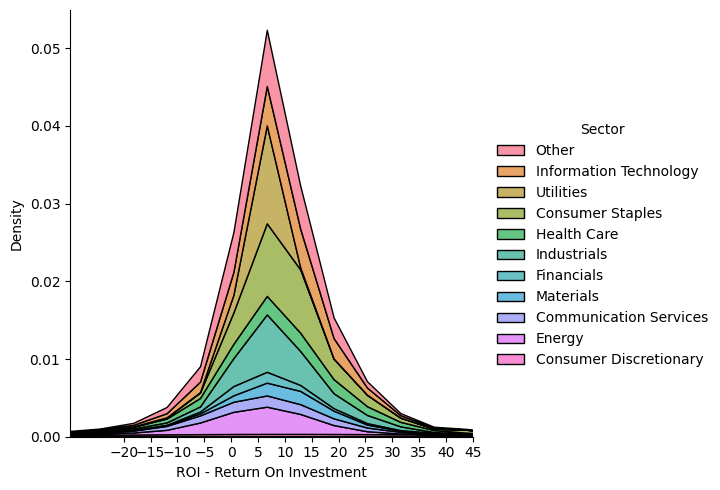

In [88]:
sns.displot(df, x='ROI - Return On Investment', hue='Sector', kind="kde", multiple='stack')
plt.xlim(-30,30)
plt.xticks(range(-20, 50, 5))
plt.show()

Rangos de ROI - Return On Investment: Fluctuan entre -100% y 200% generalmente. Valores mayores a 2 podrían ser considerados como valores atípicos, por lo cual, se debe utilizar como punto de referencia otras empresas de la misma Industria para analizarlos.

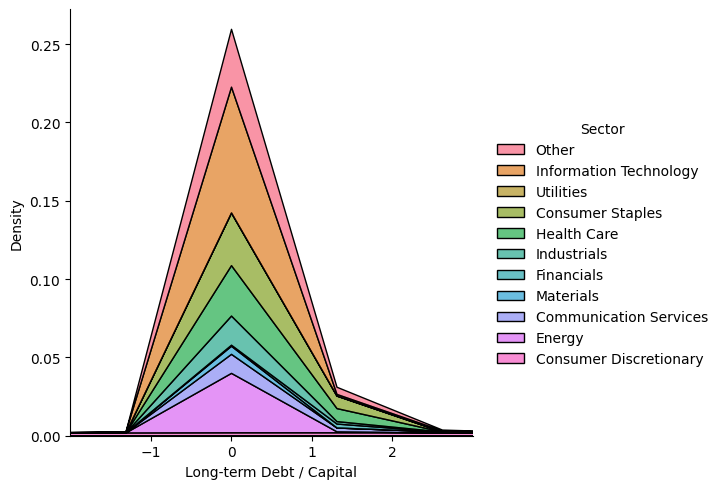

In [89]:
sns.displot(df, x='Long-term Debt / Capital', hue='Sector', kind="kde", multiple='stack')
plt.xlim(-2,3)
plt.xticks(range(-1, 3, 1))
plt.show()

Rangos de Long-Term Debt / Capital: Los Coeficientes de Endeudamiento dependen directamente de la etapa de creciemiento de la empresa y de la Industria a la cual pertenecen. En general, empresas de crecimiento rápido como las startups poseen altos coeficientes de endeudamiento a diferencia de empresas más maduras, por otro lado, se conoce que empresas del mundo financiero y de retail, suelen tener mayores coeficientes de endeudamiento, llegando algunas veces a alcanzar relaciones de endeudamiento sobre capital de 2:1. Finalmente, los ratios de endeudamiento negativos, indican que la empresa no dispone de ningún recurso propio para financiarse.

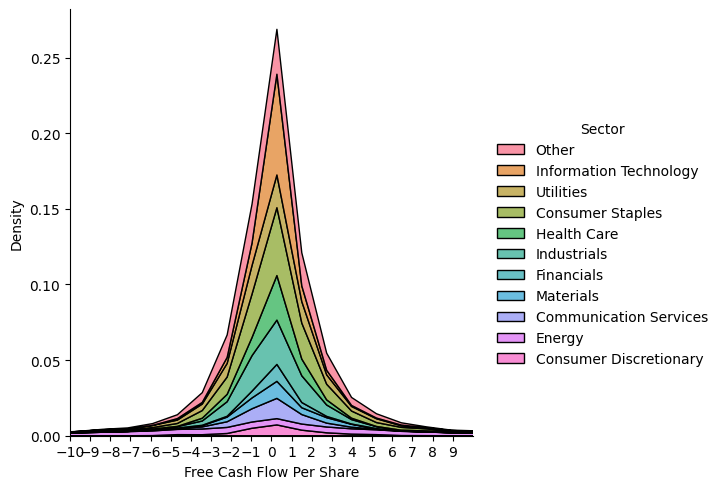

In [90]:
sns.displot(df, x='Free Cash Flow Per Share', hue='Sector', kind="kde", multiple='stack')
plt.xlim(-10,10)
plt.xticks(range(-10, 10, 1))
plt.show()

Rangos de Free Cash Flow Per Share: Es difícil definir un rango de valores aceptables, ya que este valor depende directamente del número de acciones que posee la empresa en circulación, por lo tanto puede variar significativamente entre una empresa y otra con flujos de caja similares.

TRATAMIENTO DE OUTLIERS

Distribuciones Asimétricas
1. Long-term Debt / Capital

In [91]:
# Método de las Desviaciones Absolutas Medianas (MAD)
median = np.median(df['Long-term Debt / Capital'])
mad = np.median(np.abs(df['Long-term Debt / Capital'] - median))

# Definir umbral para los outliers por lo general se usa desde 2,5 hasta 3,5
threshold = 3.5

# Detección de outliers
outliers = df['Long-term Debt / Capital'][np.abs(df['Long-term Debt / Capital'] - median) / mad > threshold]

print("Outliers detectados por el Método de las Desviaciones Absolutas Medianas (MAD):")
print(outliers)

Outliers detectados por el Método de las Desviaciones Absolutas Medianas (MAD):
40        1.0097
101       0.9006
222     171.5000
139       9.9583
308       1.1522
          ...   
7707      1.0701
7353      0.9151
7539      0.9743
7675      0.9361
7746      1.1391
Name: Long-term Debt / Capital, Length: 443, dtype: float64


El método MAD, identifica muchos valores atípicos que NO necesariamente lo son, de acuerdo al conocimiento financiero de los ratios.

In [92]:
df['Long-term Debt / Capital'].describe()

count    7285.000000
mean        0.451092
std         2.719571
min       -86.363600
25%         0.286500
50%         0.424900
75%         0.537900
max       171.500000
Name: Long-term Debt / Capital, dtype: float64

Se procede a definir como Outliers, todos aquellos valores de 'Long-term Debt / Capital' > 2 y -1 < 'Long-term Debt / Capital'.

In [176]:
# Detección de outliers
df['Long-term Debt / Capital Outliers'] = 0
df.loc[(df['Long-term Debt / Capital'] > 2) | (df['Long-term Debt / Capital'] < -1) , 'Long-term Debt / Capital Outliers'] = 1
df[['Long-term Debt / Capital','Long-term Debt / Capital Outliers']][df['Long-term Debt / Capital Outliers'] == 1]

,Long-term Debt / Capital,Long-term Debt / Capital Outliers
222,44.057075,1
139,5.429450,1
112,2.455300,1
114,2.455300,1
115,2.455300,1
1000,-30.467475,1
1003,-30.467475,1
1001,-30.467475,1
1002,-30.467475,1
2226,6.255950,1


In [177]:
df['Long-term Debt / Capital Outliers'].value_counts()

Long-term Debt / Capital Outliers
0    7270
1      15
Name: count, dtype: int64

In [178]:
df['Long-term Debt / Capital'][df['Long-term Debt / Capital Outliers'] == 1].describe()

count    15.000000
mean     -2.686131
std      20.194374
min     -30.467475
25%     -14.006088
50%       2.744133
75%       4.396063
max      44.057075
Name: Long-term Debt / Capital, dtype: float64

In [179]:
# Creamos un diccionario con la agrupación de las categorías 'Rating','Sector','Year', 'Month', 'Week'. 
mapping_dict_1 = df.set_index(['Rating','Sector','Year', 'Month'])['Long-term Debt / Capital'].to_dict()
mapping_dict_1

{('Media Inferior', 'Other', 2010, 4): 0.246,
 ('Media', 'Information Technology', 2010, 5): 0.3398,
 ('Alta', 'Utilities', 2010, 6): 0.4708,
 ('Altamente Especulativa', 'Consumer Staples', 2010, 6): 0.1589,
 ('Media', 'Utilities', 2010, 6): 0.4769,
 ('Especulativa', 'Health Care', 2010, 6): 0.3479,
 ('Media', 'Utilities', 2010, 7): 0.4551,
 ('Media Superior', 'Consumer Staples', 2010, 7): 0.2644,
 ('Media Inferior', 'Industrials', 2010, 7): 0.1909,
 ('Alta', 'Information Technology', 2010, 9): 0.0072,
 ('Media', 'Consumer Staples', 2010, 9): 0.2644,
 ('Media', 'Utilities', 2010, 9): 0.8416,
 ('Media Inferior', 'Other', 2010, 9): 0.3207,
 ('Media', 'Financials', 2010, 9): 1.0097,
 ('Media', 'Consumer Staples', 2010, 10): 0.6308,
 ('Media Inferior', 'Other', 2010, 10): 0.2694,
 ('Altamente Especulativa', 'Other', 2010, 10): 0.3631,
 ('Media Inferior', 'Consumer Staples', 2010, 11): 0.2924,
 ('Especulativa', 'Industrials', 2010, 11): 0.2304,
 ('Media Superior', 'Other', 2010, 11): 0.0053

In [181]:
# Valores promedio por agrupación:
average_ltd_cap_dict = df.groupby(['Rating','Sector','Year', 'Month'])['Long-term Debt / Capital'].mean().to_dict()
average_ltd_cap_dict

{('Alta', 'Communication Services', 2013, 9): 0.4602,
 ('Alta', 'Communication Services', 2014, 7): 0.0507,
 ('Alta', 'Communication Services', 2014, 9): 0.0507,
 ('Alta', 'Consumer Discretionary', 2013, 11): 0.6136,
 ('Alta', 'Consumer Discretionary', 2014, 5): 0.6308,
 ('Alta', 'Consumer Discretionary', 2014, 7): 0.6308,
 ('Alta', 'Consumer Discretionary', 2014, 10): 0.6308,
 ('Alta', 'Consumer Discretionary', 2015, 2): 0.5317,
 ('Alta', 'Consumer Discretionary', 2015, 4): 0.5317,
 ('Alta', 'Consumer Staples', 2011, 2): 0.664,
 ('Alta', 'Consumer Staples', 2011, 3): 0.4822,
 ('Alta', 'Consumer Staples', 2012, 6): 0.3175,
 ('Alta', 'Consumer Staples', 2012, 8): 0.26305,
 ('Alta', 'Consumer Staples', 2012, 10): 0.496,
 ('Alta', 'Consumer Staples', 2012, 11): 0.0318,
 ('Alta', 'Consumer Staples', 2013, 1): 0.665,
 ('Alta', 'Consumer Staples', 2013, 2): 0.5125,
 ('Alta', 'Consumer Staples', 2013, 4): 0.4695,
 ('Alta', 'Consumer Staples', 2013, 5): 0.0994,
 ('Alta', 'Consumer Staples', 20

In [182]:
# Utilizamos una función para reemplazar los valores promedios de las categorías, siempre y cuando el valor sea un Outlier.
def replace_with_average(row, average_ltd_cap_dict):
    if row['Long-term Debt / Capital Outliers'] == 1:
        return average_ltd_cap_dict.get((row['Rating'], row['Sector'], row['Year'], row['Month']), row['Long-term Debt / Capital'])
    return row['Long-term Debt / Capital']

# Reemplazamos el Precio por el Promedio en la misma columna.
df['Long-term Debt / Capital'] = df.apply(replace_with_average, axis=1, args=(average_ltd_cap_dict,))

df_ltd_cap_updated = df[df['Long-term Debt / Capital Outliers'] == 1]

In [183]:
df_ltd_cap_updated.groupby(['Rating','Sector','Year', 'Month'])['Long-term Debt / Capital'].describe().round(1)

count  mean  std  \
Rating                 Sector                 Year Month                     
Altamente Especulativa Consumer Discretionary 2013 9        1.0   3.4  NaN   
                                                   12       1.0   3.4  NaN   
Riesgo Sustancial      Communication Services 2011 4        1.0   2.5  NaN   
                                                   7        1.0   2.5  NaN   
                                                   9        1.0   2.5  NaN   
                       Consumer Discretionary 2011 1        1.0  44.1  NaN   
                                              2012 2        1.0 -30.5  NaN   
                                                   6        1.0 -14.8  NaN   
                                                   9        1.0 -30.5  NaN   
                                                   11       1.0 -14.8  NaN   
                                              2013 2        1.0   6.3  NaN   
                                                   5        1.0   6.3  NaN   
                                              2014 2        1.0   2.7  NaN   
                                                   6        1.0   2.7  NaN   
                       Information Technology 2011 2        1.0   5.4  NaN   

                                                           min   25%   50%  \
Rating                 Sector                 Year Month                     
Altamente Especulativa Consumer Discretionary 2013 9       3.4   3.4   3.4   
                                                   12      3.4   3.4   3.4   
Riesgo Sustancial      Communication Services 2011 4       2.5   2.5   2.5   
                                                   7       2.5   2.5   2.5   
                                                   9       2.5   2.5   2.5   
                       Consumer Discretionary 2011 1      44.1  44.1  44.1   
                                              2012 2     -30.5 -30.5 -30.5   
                                                   6     -14.8 -14.8 -14.8   
                                                   9     -30.5 -30.5 -30.5   
                                                   11    -14.8 -14.8 -14.8   
                                              2013 2       6.3   6.3   6.3   
                                                   5       6.3   6.3   6.3   
                                              2014 2       2.7   2.7   2.7   
                                                   6       2.7   2.7   2.7   
                       Information Technology 2011 2       5.4   5.4   5.4   

                                                           75%   max  
Rating                 Sector                 Year Month              
Altamente Especulativa Consumer Discretionary 2013 9       3.4   3.4  
                                                   12      3.4   3.4  
Riesgo Sustancial      Communication Services 2011 4       2.5   2.5  
                                                   7       2.5   2.5  
                                                   9       2.5   2.5  
                       Consumer Discretionary 2011 1      44.1  44.1  
                                              2012 2     -30.5 -30.5  
                                                   6     -14.8 -14.8  
                                                   9     -30.5 -30.5  
                                                   11    -14.8 -14.8  
                                              2013 2       6.3   6.3  
                                                   5       6.3   6.3  
                                              2014 2       2.7   2.7  
                                                   6       2.7   2.7  
                       Information Technology 2011 2       5.4   5.4

In [224]:
# Creamos un diccionario con la agrupación de las categorías 'Rating','Sector','Year'.
mapping_dict_1 = df.set_index(['Rating','Sector','Year'])['Long-term Debt / Capital'].to_dict()
mapping_dict_1

{('Media Inferior', 'Other', 2010): 0.2694,
 ('Media', 'Information Technology', 2010): 0.3398,
 ('Alta', 'Utilities', 2010): 0.3901,
 ('Altamente Especulativa', 'Consumer Staples', 2010): 0.1589,
 ('Media', 'Utilities', 2010): 0.8416,
 ('Especulativa', 'Health Care', 2010): 0.3479,
 ('Media Superior', 'Consumer Staples', 2010): 0.2644,
 ('Media Inferior', 'Industrials', 2010): 0.3116,
 ('Alta', 'Information Technology', 2010): 0.0966,
 ('Media', 'Consumer Staples', 2010): 0.2072,
 ('Media', 'Financials', 2010): 1.0097,
 ('Altamente Especulativa', 'Other', 2010): 0.0617,
 ('Media Inferior', 'Consumer Staples', 2010): 0.2924,
 ('Especulativa', 'Industrials', 2010): 0.2304,
 ('Media Superior', 'Other', 2010): 0.0053,
 ('Especulativa', 'Information Technology', 2010): 0.3901,
 ('Altamente Especulativa', 'Materials', 2010): 0.8595,
 ('Media Superior', 'Utilities', 2010): 0.8416,
 ('Media Inferior', 'Communication Services', 2010): 0.5897,
 ('Especulativa', 'Utilities', 2010): 0.5642,
 ('Me

In [225]:
# Valores promedio por agrupación:
average_ltd_cap_dict = df.groupby(['Rating','Sector','Year'])['Long-term Debt / Capital'].mean().to_dict()
average_ltd_cap_dict

{('Alta', 'Communication Services', 2013): 0.4602,
 ('Alta', 'Communication Services', 2014): 0.0507,
 ('Alta', 'Consumer Discretionary', 2013): 0.6136,
 ('Alta', 'Consumer Discretionary', 2014): 0.6308,
 ('Alta', 'Consumer Discretionary', 2015): 0.5317,
 ('Alta', 'Consumer Staples', 2011): 0.5731,
 ('Alta', 'Consumer Staples', 2012): 0.28148333333333336,
 ('Alta', 'Consumer Staples', 2013): 0.3076083333333333,
 ('Alta', 'Consumer Staples', 2014): 0.27854999999999996,
 ('Alta', 'Consumer Staples', 2015): 0.3207869565217391,
 ('Alta', 'Consumer Staples', 2016): 0.4251666666666667,
 ('Alta', 'Energy', 2011): 0.0784,
 ('Alta', 'Energy', 2012): 0.11277142857142856,
 ('Alta', 'Energy', 2013): 0.13053333333333333,
 ('Alta', 'Energy', 2014): 0.16581666666666667,
 ('Alta', 'Energy', 2015): 0.11833600000000001,
 ('Alta', 'Energy', 2016): 0.10901000000000001,
 ('Alta', 'Health Care', 2011): 0.26753,
 ('Alta', 'Health Care', 2012): 0.22846923076923076,
 ('Alta', 'Health Care', 2013): 0.2102318181

In [226]:
# Detección de Outliers 2
df.loc[(df['Long-term Debt / Capital'] > 2) | (df['Long-term Debt / Capital'] < -1) , 'Long-term Debt / Capital Outliers'] = 2
df[['Long-term Debt / Capital','Long-term Debt / Capital Outliers']][df['Long-term Debt / Capital Outliers'] == 2]

,Long-term Debt / Capital,Long-term Debt / Capital Outliers
222,44.057075,2.0
139,5.429450,2.0
112,2.455300,2.0
114,2.455300,2.0
115,2.455300,2.0
1000,-30.467475,2.0
1003,-14.832338,2.0
1001,-30.467475,2.0
1002,-14.758738,2.0
2226,6.255950,2.0


In [227]:
# Utilizamos una función para reemplazar los valores promedios de las categorías, siempre y cuando el valor sea un Outlier.
def replace_with_average(row, average_ltd_cap_dict):
    if row['Long-term Debt / Capital Outliers'] == 2:
        return average_ltd_cap_dict.get((row['Rating'], row['Sector'], row['Year']), row['Long-term Debt / Capital'])
    return row['Long-term Debt / Capital']

# Reemplazamos el Precio por el Promedio en la misma columna.
df['Long-term Debt / Capital'] = df.apply(replace_with_average, axis=1, args=(average_ltd_cap_dict,))

df_ltd_cap_updated = df[df['Long-term Debt / Capital Outliers'] == 2]

In [228]:
df_ltd_cap_updated.groupby(['Rating','Sector','Year'])['Long-term Debt / Capital'].describe().round(1)

count  mean  std   min  \
Rating                 Sector                 Year                           
Altamente Especulativa Consumer Discretionary 2013    2.0   1.6  0.0   1.6   
Riesgo Sustancial      Communication Services 2011    3.0   2.5  0.0   2.5   
                       Consumer Discretionary 2011    1.0  12.2  NaN  12.2   
                                              2012    4.0 -14.8  0.0 -14.8   
                                              2013    2.0   2.6  0.0   2.6   
                                              2014    2.0   2.1  0.0   2.1   
                       Information Technology 2011    1.0   3.2  NaN   3.2   

                                                     25%   50%   75%   max  
Rating                 Sector                 Year                          
Altamente Especulativa Consumer Discretionary 2013   1.6   1.6   1.6   1.6  
Riesgo Sustancial      Communication Services 2011   2.5   2.5   2.5   2.5  
                       Consumer Discretionary 2011  12.2  12.2  12.2  12.2  
                                              2012 -14.8 -14.8 -14.8 -14.8  
                                              2013   2.6   2.6   2.6   2.6  
                                              2014   2.1   2.1   2.1   2.1  
                       Information Technology 2011   3.2   3.2   3.2   3.2

In [230]:
# Creamos un diccionario con la agrupación de las categorías 'Rating','Sector'.
mapping_dict_1 = df.set_index(['Rating','Sector'])['Long-term Debt / Capital'].to_dict()
mapping_dict_1

{('Media Inferior', 'Other'): 0.5235,
 ('Media', 'Information Technology'): 0.2404,
 ('Alta', 'Utilities'): 0.4291,
 ('Altamente Especulativa', 'Consumer Staples'): 0.6772,
 ('Media', 'Utilities'): 0.5108,
 ('Especulativa', 'Health Care'): 0.2419,
 ('Media Superior', 'Consumer Staples'): 0.7083,
 ('Media Inferior', 'Industrials'): 0.3709,
 ('Alta', 'Information Technology'): 0.1267,
 ('Media', 'Consumer Staples'): 0.6271,
 ('Media', 'Financials'): 0.5162,
 ('Altamente Especulativa', 'Other'): 0.3391,
 ('Media Inferior', 'Consumer Staples'): 0.3918,
 ('Especulativa', 'Industrials'): 0.3024,
 ('Media Superior', 'Other'): 0.3677,
 ('Especulativa', 'Information Technology'): 0.165,
 ('Altamente Especulativa', 'Materials'): 0.7482,
 ('Media Superior', 'Utilities'): 0.4556,
 ('Media Inferior', 'Communication Services'): 0.1948,
 ('Especulativa', 'Utilities'): 0.4581,
 ('Media Superior', 'Industrials'): 0.1398,
 ('Altamente Especulativa', 'Information Technology'): 0.8683,
 ('Altamente Especu

In [231]:
# Valores promedio por agrupación:
average_ltd_cap_dict = df.groupby(['Rating','Sector'])['Long-term Debt / Capital'].mean().to_dict()
average_ltd_cap_dict

{('Alta', 'Communication Services'): 0.1872,
 ('Alta', 'Consumer Discretionary'): 0.5949,
 ('Alta', 'Consumer Staples'): 0.3144090909090909,
 ('Alta', 'Energy'): 0.1318064935064935,
 ('Alta', 'Health Care'): 0.21290185185185187,
 ('Alta', 'Industrials'): 0.294644776119403,
 ('Alta', 'Information Technology'): 0.17342123893805308,
 ('Alta', 'Materials'): 0.5570333333333334,
 ('Alta', 'Other'): 0.3697142857142857,
 ('Alta', 'Utilities'): 0.4670127272727273,
 ('Altamente Especulativa', 'Communication Services'): 0.8488243961352657,
 ('Altamente Especulativa', 'Consumer Discretionary'): 0.9562622098646034,
 ('Altamente Especulativa', 'Consumer Staples'): 0.49607664974619287,
 ('Altamente Especulativa', 'Energy'): 0.4947792967124428,
 ('Altamente Especulativa', 'Financials'): 0.8211416666666667,
 ('Altamente Especulativa', 'Health Care'): 0.7742371428571428,
 ('Altamente Especulativa', 'Industrials'): 0.44797635135135133,
 ('Altamente Especulativa', 'Information Technology'): 0.5035035,
 ('

In [232]:
# Detección de Outliers 3
df.loc[(df['Long-term Debt / Capital'] > 2) | (df['Long-term Debt / Capital'] < -1) , 'Long-term Debt / Capital Outliers'] = 3
df[['Long-term Debt / Capital','Long-term Debt / Capital Outliers']][df['Long-term Debt / Capital Outliers'] == 3]

,Long-term Debt / Capital,Long-term Debt / Capital Outliers
222,12.196344,3.0
139,3.165025,3.0
112,2.455300,3.0
114,2.455300,3.0
115,2.455300,3.0
1000,-14.795538,3.0
1003,-14.795538,3.0
1001,-14.795538,3.0
1002,-14.795538,3.0
2226,2.552367,3.0


In [233]:
# Utilizamos una función para reemplazar los valores promedios de las categorías, siempre y cuando el valor sea un Outlier.
def replace_with_average(row, average_ltd_cap_dict):
    if row['Long-term Debt / Capital Outliers'] == 3:
        return average_ltd_cap_dict.get((row['Rating'], row['Sector']), row['Long-term Debt / Capital'])
    return row['Long-term Debt / Capital']

# Reemplazamos el Precio por el Promedio en la misma columna.
df['Long-term Debt / Capital'] = df.apply(replace_with_average, axis=1, args=(average_ltd_cap_dict,))

df_ltd_cap_updated = df[df['Long-term Debt / Capital Outliers'] == 3]

In [234]:
df_ltd_cap_updated.groupby(['Rating','Sector'])['Long-term Debt / Capital'].describe().round(1)

count  mean  std  min  25%  50%  \
Rating            Sector                                                    
Riesgo Sustancial Communication Services    3.0   0.7  0.0  0.7  0.7  0.7   
                  Consumer Discretionary    9.0  -1.3  0.0 -1.3 -1.3 -1.3   
                  Information Technology    1.0   0.7  NaN  0.7  0.7  0.7   

                                          75%  max  
Rating            Sector                            
Riesgo Sustancial Communication Services  0.7  0.7  
                  Consumer Discretionary -1.3 -1.3  
                  Information Technology  0.7  0.7

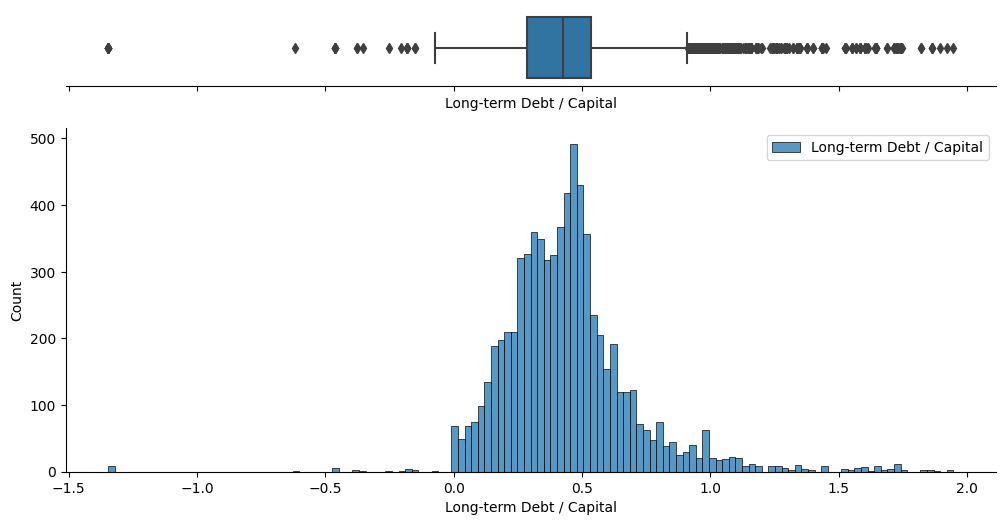

In [235]:
# Box Plot 3: Long-term Debt / Capital
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['Long-term Debt / Capital'], ax=ax_box, orient="h") 
sns.histplot(df['Long-term Debt / Capital'], ax=ax_hist, label='Long-term Debt / Capital')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

In [236]:
df.drop(columns='Long-term Debt / Capital Outliers', inplace=True)

Distribuciones Simétricas
1. Current Ratio
2. ROI - Return On Investment
3. Free Cash Flow Per Share

In [190]:
# Variable Dependiente: 'Current Ratio'
# Identificamos los valores atípicos de acuerdo al modelo Z-Score (Estandarización). 
# Estandarizamos los valores de la variable, para poder comparar todos los valores bajo una misma regla, haciendo más fácil la identificación de valores atípicos.

df['Current Ratio Z'] = (df['Current Ratio'] - df['Current Ratio'].mean())/df['Current Ratio'].std()
df['Current Ratio Outliers'] = 0
df.loc[(df['Current Ratio Z']>3)|(df['Current Ratio Z']<-3) , 'Current Ratio Outliers'] = 1
df[['Current Ratio', 'Current Ratio Z','Current Ratio Outliers']]

,Current Ratio,Current Ratio Z,Current Ratio Outliers
33,2.9659,1.097771,0
8,1.0668,-0.658439,0
3,0.8358,-0.872058,0
16,2.5430,0.706690,0
29,0.8361,-0.871781,0
...,...,...,...
7299,1.9068,0.118359,0
7434,2.8042,0.948238,0
7506,1.4496,-0.304441,0
7585,2.8601,0.999932,0


In [191]:
df['Current Ratio Outliers'].value_counts()

Current Ratio Outliers
0    7124
1     161
Name: count, dtype: int64

In [192]:
print(df.loc[df['Current Ratio Outliers']== 1, 'Current Ratio'])

24      7.920600
130     5.569100
73      7.466588
208     5.285900
225     5.215700
          ...   
7472    6.376100
7733    7.504800
7245    5.171400
7444    6.376100
6990    5.963700
Name: Current Ratio, Length: 161, dtype: float64


In [193]:
print(df.loc[df['Current Ratio Outliers'] == 1, 'Current Ratio'].max())
print(df.loc[df['Current Ratio Outliers'] == 1, 'Current Ratio'].min())

7.9206
5.0284


In [195]:
# Creamos un diccionario con la agrupación de las categorías 'Rating','Sector','Year'.
mapping_dict_2 = df.set_index(['Rating','Sector','Year'])['Current Ratio'].to_dict()
mapping_dict_2

{('Media Inferior', 'Other', 2010): 2.5095,
 ('Media', 'Information Technology', 2010): 1.0668,
 ('Alta', 'Utilities', 2010): 1.2984,
 ('Altamente Especulativa', 'Consumer Staples', 2010): 2.543,
 ('Media', 'Utilities', 2010): 0.7722,
 ('Especulativa', 'Health Care', 2010): 1.3661,
 ('Media Superior', 'Consumer Staples', 2010): 1.2931,
 ('Media Inferior', 'Industrials', 2010): 3.7607,
 ('Alta', 'Information Technology', 2010): 2.1293,
 ('Media', 'Consumer Staples', 2010): 2.295,
 ('Media', 'Financials', 2010): 2.612,
 ('Altamente Especulativa', 'Other', 2010): 1.2311,
 ('Media Inferior', 'Consumer Staples', 2010): 1.9276,
 ('Especulativa', 'Industrials', 2010): 1.7141,
 ('Media Superior', 'Other', 2010): 1.5515,
 ('Especulativa', 'Information Technology', 2010): 1.2909,
 ('Altamente Especulativa', 'Materials', 2010): 2.8907,
 ('Media Superior', 'Utilities', 2010): 0.7722,
 ('Media Inferior', 'Communication Services', 2010): 0.5842,
 ('Especulativa', 'Utilities', 2010): 0.9941,
 ('Media

In [196]:
# Valores promedio por agrupación:
average_cr_dict = df.groupby(['Rating','Sector','Year'])['Current Ratio'].mean().to_dict()
average_cr_dict

{('Alta', 'Communication Services', 2013): 1.2813,
 ('Alta', 'Communication Services', 2014): 3.1561,
 ('Alta', 'Consumer Discretionary', 2013): 1.6832,
 ('Alta', 'Consumer Discretionary', 2014): 2.6951,
 ('Alta', 'Consumer Discretionary', 2015): 1.5894,
 ('Alta', 'Consumer Staples', 2011): 1.31345,
 ('Alta', 'Consumer Staples', 2012): 1.7008166666666666,
 ('Alta', 'Consumer Staples', 2013): 1.6753,
 ('Alta', 'Consumer Staples', 2014): 1.5244849999999999,
 ('Alta', 'Consumer Staples', 2015): 1.458995652173913,
 ('Alta', 'Consumer Staples', 2016): 2.0527,
 ('Alta', 'Energy', 2011): 1.24045,
 ('Alta', 'Energy', 2012): 1.354542857142857,
 ('Alta', 'Energy', 2013): 1.6781,
 ('Alta', 'Energy', 2014): 1.6017083333333335,
 ('Alta', 'Energy', 2015): 1.350992,
 ('Alta', 'Energy', 2016): 1.10458,
 ('Alta', 'Health Care', 2011): 1.8795299999999997,
 ('Alta', 'Health Care', 2012): 1.7750923076923077,
 ('Alta', 'Health Care', 2013): 2.0622136363636367,
 ('Alta', 'Health Care', 2014): 1.962762068965

In [197]:
# Utilizamos una función para reemplazar los valores promedios de las categorías, siempre y cuando el valor sea un Outlier.
def replace_with_average(row, average_cr_dict):
    if row['Current Ratio Outliers'] == 1:
        return average_cr_dict.get((row['Rating'], row['Sector'], row['Year']), row['Current Ratio'])
    return row['Current Ratio']

# Reemplazamos el Precio por el Promedio en la misma columna.
df['Current Ratio'] = df.apply(replace_with_average, axis=1, args=(average_cr_dict,))

df_cr_updated = df[df['Current Ratio Outliers'] == 1]

In [198]:
df_cr_updated.groupby(['Rating','Sector','Year'])['Current Ratio'].describe().round(1)

count  mean  std  min  \
Rating                 Sector                 Year                          
Alta                   Information Technology 2012    3.0   3.5  0.0  3.5   
                                              2014    4.0   2.8  0.0  2.8   
Altamente Especulativa Communication Services 2015    1.0   1.5  NaN  1.5   
                                              2016    1.0   2.4  NaN  2.4   
                       Industrials            2013    1.0   2.4  NaN  2.4   
                                              2014    2.0   2.5  0.0  2.5   
                       Information Technology 2010    1.0   7.9  NaN  7.9   
                                              2011    2.0   3.1  0.0  3.1   
                                              2013    3.0   2.3  0.0  2.3   
                                              2014    3.0   2.8  0.0  2.8   
                                              2015    2.0   2.5  0.0  2.5   
                                              2016    2.0   2.5  0.0  2.5   
                       Other                  2011    1.0   2.3  NaN  2.3   
                                              2012    1.0   2.2  NaN  2.2   
                                              2013    4.0   1.9  0.0  1.9   
                                              2014    7.0   2.5  0.0  2.5   
                                              2015    2.0   2.0  0.0  2.0   
                                              2016    1.0   1.9  NaN  1.9   
Especulativa           Health Care            2016    2.0   2.4  0.0  2.4   
                       Industrials            2011    1.0   2.8  NaN  2.8   
                                              2013    2.0   2.1  0.0  2.1   
                                              2014    1.0   2.0  NaN  2.0   
                                              2016    3.0   2.9  0.0  2.9   
                       Information Technology 2014    5.0   2.5  0.0  2.5   
                                              2015    9.0   3.2  0.0  3.2   
                                              2016    3.0   2.4  0.0  2.4   
                       Other                  2011    2.0   2.5  0.0  2.5   
                                              2012    1.0   2.0  NaN  2.0   
                                              2013    7.0   2.9  0.0  2.9   
                                              2014    6.0   2.7  0.0  2.7   
                                              2015    7.0   2.4  0.0  2.4   
                                              2016    1.0   2.0  NaN  2.0   
Media                  Industrials            2013    2.0   2.2  0.0  2.2   
                       Information Technology 2014    2.0   2.1  0.0  2.1   
                                              2015    3.0   2.7  0.0  2.7   
                                              2016    1.0   2.8  NaN  2.8   
                       Other                  2014    5.0   1.9  0.0  1.9   
                                              2015    1.0   1.6  NaN  1.6   
                                              2016    3.0   2.0  0.0  2.0   
Media Inferior         Consumer Staples       2015    3.0   1.8  0.0  1.8   
                       Health Care            2013    1.0   2.0  NaN  2.0   
                       Information Technology 2014    1.0   2.1  NaN  2.1   
                                              2015    1.0   2.0  NaN  2.0   
                                              2016    2.0   2.0  0.0  2.0   
                       Other                  2013    2.0   2.0  0.0  2.0   
                                              2014    4.0   2.2  0.0  2.2   
                                              2015    3.0   2.0  0.0  2.0   
                                              2016    1.0   1.8  NaN  1.8   
Media Superior         Financials             2014    4.0   3.8  0.0  3.8   
                       Health Care            2013    2.0   2.2  0.0  2.2   
                       Information Technology 20

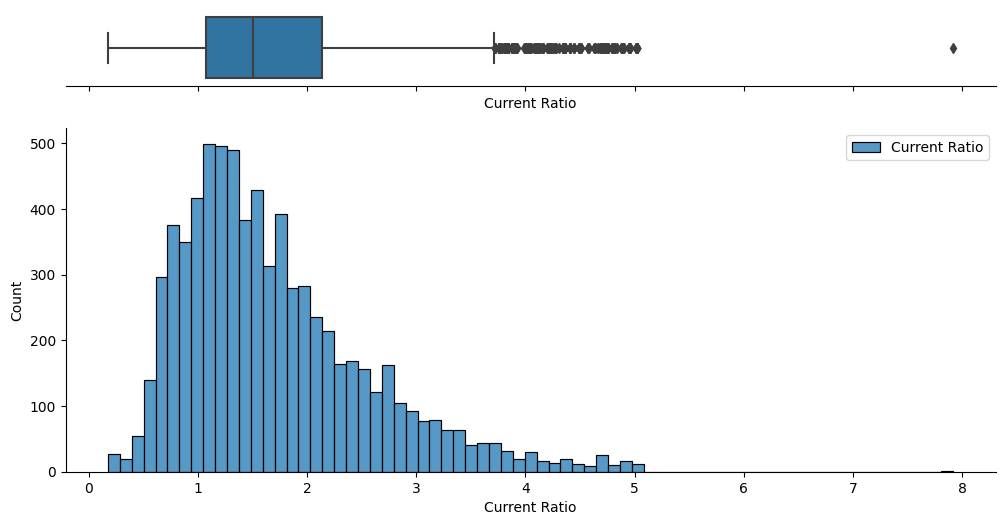

In [199]:
# Box Plot 1: Current Ratio
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['Current Ratio'], ax=ax_box, orient="h") 
sns.histplot(df['Current Ratio'], ax=ax_hist, label='Current Ratio')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

In [200]:
df.drop(columns='Current Ratio Outliers', inplace=True)

In [201]:
# Variable Dependiente: 'ROI - Return On Investment'
# Identificamos los valores atípicos de acuerdo al modelo Z-Score (Estandarización). 
# Estandarizamos los valores de la variable, para poder comparar todos los valores bajo una misma regla, haciendo más fácil la identificación de valores atípicos.

df['ROI - Return On Investment Z'] = (df['ROI - Return On Investment'] - df['ROI - Return On Investment'].mean())/df['ROI - Return On Investment'].std()
df['ROI - Return On Investment Outliers'] = 0
df.loc[(df['ROI - Return On Investment Z']>3)|(df['ROI - Return On Investment Z']<-3) , 'ROI - Return On Investment Outliers'] = 1
df[['ROI - Return On Investment', 'ROI - Return On Investment Z','ROI - Return On Investment Outliers']]

,ROI - Return On Investment,ROI - Return On Investment Z,ROI - Return On Investment Outliers
33,18.0982,1.000335,0
8,11.8033,0.380510,0
3,5.1018,-0.279351,0
16,7.1744,-0.075273,0
29,5.9535,-0.195489,0
...,...,...,...
7299,5.1347,-0.276112,0
7434,26.3841,1.816204,0
7506,-0.1661,-0.798053,0
7585,1.9387,-0.590805,0


In [202]:
df['ROI - Return On Investment Outliers'].value_counts()

ROI - Return On Investment Outliers
0    7130
1     155
Name: count, dtype: int64

In [203]:
print(df.loc[df['ROI - Return On Investment Outliers']== 1, 'ROI - Return On Investment'])

66     -34.0472
712     74.8734
944     55.7112
456     41.1451
397     80.9800
         ...   
7245   -32.4356
7269   -40.9406
7713   -45.3697
7027    75.4837
7482   -26.1048
Name: ROI - Return On Investment, Length: 155, dtype: float64


In [204]:
print(df.loc[df['ROI - Return On Investment Outliers'] == 1, 'ROI - Return On Investment'].max())
print(df.loc[df['ROI - Return On Investment Outliers'] == 1, 'ROI - Return On Investment'].min())

80.98
-65.2162


In [206]:
# Creamos un diccionario con la agrupación de las categorías 'Rating','Sector','Year'.
mapping_dict_3 = df.set_index(['Rating','Sector','Year'])['ROI - Return On Investment'].to_dict()
mapping_dict_3

{('Media Inferior', 'Other', 2010): 12.2155,
 ('Media', 'Information Technology', 2010): 11.8033,
 ('Alta', 'Utilities', 2010): 6.1985,
 ('Altamente Especulativa', 'Consumer Staples', 2010): 7.1744,
 ('Media', 'Utilities', 2010): 4.9445,
 ('Especulativa', 'Health Care', 2010): 11.0683,
 ('Media Superior', 'Consumer Staples', 2010): 8.1844,
 ('Media Inferior', 'Industrials', 2010): 0.2521,
 ('Alta', 'Information Technology', 2010): 36.7023,
 ('Media', 'Consumer Staples', 2010): 9.8233,
 ('Media', 'Financials', 2010): 5.1331,
 ('Altamente Especulativa', 'Other', 2010): 9.9812,
 ('Media Inferior', 'Consumer Staples', 2010): 9.6494,
 ('Especulativa', 'Industrials', 2010): 18.296,
 ('Media Superior', 'Other', 2010): 21.8662,
 ('Especulativa', 'Information Technology', 2010): 6.5385,
 ('Altamente Especulativa', 'Materials', 2010): 5.5655,
 ('Media Superior', 'Utilities', 2010): 4.9445,
 ('Media Inferior', 'Communication Services', 2010): 9.2717,
 ('Especulativa', 'Utilities', 2010): 2.4976,


In [207]:
# Valores promedio por agrupación:
average_ROI_dict = df.groupby(['Rating','Sector','Year'])['ROI - Return On Investment'].mean().to_dict()
average_ROI_dict

{('Alta', 'Communication Services', 2013): 1.2813,
 ('Alta', 'Communication Services', 2014): 3.1561,
 ('Alta', 'Consumer Discretionary', 2013): 8.7495,
 ('Alta', 'Consumer Discretionary', 2014): 9.0056,
 ('Alta', 'Consumer Discretionary', 2015): 11.4219,
 ('Alta', 'Consumer Staples', 2011): 17.27355,
 ('Alta', 'Consumer Staples', 2012): 13.710033333333334,
 ('Alta', 'Consumer Staples', 2013): 12.622675000000001,
 ('Alta', 'Consumer Staples', 2014): 11.527845000000001,
 ('Alta', 'Consumer Staples', 2015): 13.24295652173913,
 ('Alta', 'Consumer Staples', 2016): 18.705133333333333,
 ('Alta', 'Energy', 2011): 13.165399999999998,
 ('Alta', 'Energy', 2012): 15.149914285714285,
 ('Alta', 'Energy', 2013): 18.59968888888889,
 ('Alta', 'Energy', 2014): 17.154487500000002,
 ('Alta', 'Energy', 2015): 13.860976,
 ('Alta', 'Energy', 2016): 13.032139999999998,
 ('Alta', 'Health Care', 2011): 19.9546,
 ('Alta', 'Health Care', 2012): 16.66197692307692,
 ('Alta', 'Health Care', 2013): 14.41670454545454

In [208]:
# Utilizamos una función para reemplazar los valores promedios de las categorías, siempre y cuando el valor sea un Outlier.
def replace_with_average(row, average_ROI_dict):
    if row['ROI - Return On Investment Outliers'] == 1:
        return average_cr_dict.get((row['Rating'], row['Sector'], row['Year']), row['ROI - Return On Investment'])
    return row['ROI - Return On Investment']

# Reemplazamos el Precio por el Promedio en la misma columna.
df['ROI - Return On Investment'] = df.apply(replace_with_average, axis=1, args=(average_ROI_dict,))

df_ROI_updated = df[df['ROI - Return On Investment Outliers'] == 1]

In [209]:
df_ROI_updated.groupby(['Rating','Sector','Year'])['ROI - Return On Investment'].describe().round(1)

count  mean  std  min  \
Rating                 Sector                 Year                          
Alta                   Health Care            2012    1.0   1.8  NaN  1.8   
                       Other                  2014    1.0   1.3  NaN  1.3   
Altamente Especulativa Communication Services 2012    2.0   2.0  0.0  2.0   
                                              2013    7.0   1.2  0.0  1.2   
                       Consumer Discretionary 2014    1.0   1.5  NaN  1.5   
...                                                   ...   ...  ...  ...   
Riesgo Sustancial      Health Care            2015    4.0   2.8  0.0  2.8   
                                              2016    1.0   1.8  NaN  1.8   
                       Information Technology 2012    1.0   1.6  NaN  1.6   
                                              2013    2.0   2.2  0.0  2.2   
                       Other                  2014    2.0   2.0  0.0  2.0   

                                                    25%  50%  75%  max  
Rating                 Sector                 Year                      
Alta                   Health Care            2012  1.8  1.8  1.8  1.8  
                       Other                  2014  1.3  1.3  1.3  1.3  
Altamente Especulativa Communication Services 2012  2.0  2.0  2.0  2.0  
                                              2013  1.2  1.2  1.2  1.2  
                       Consumer Discretionary 2014  1.5  1.5  1.5  1.5  
...                                                 ...  ...  ...  ...  
Riesgo Sustancial      Health Care            2015  2.8  2.8  2.8  2.8  
                                              2016  1.8  1.8  1.8  1.8  
                       Information Technology 2012  1.6  1.6  1.6  1.6  
                                              2013  2.2  2.2  2.2  2.2  
                       Other                  2014  2.0  2.0  2.0  2.0  

[68 rows x 8 columns]

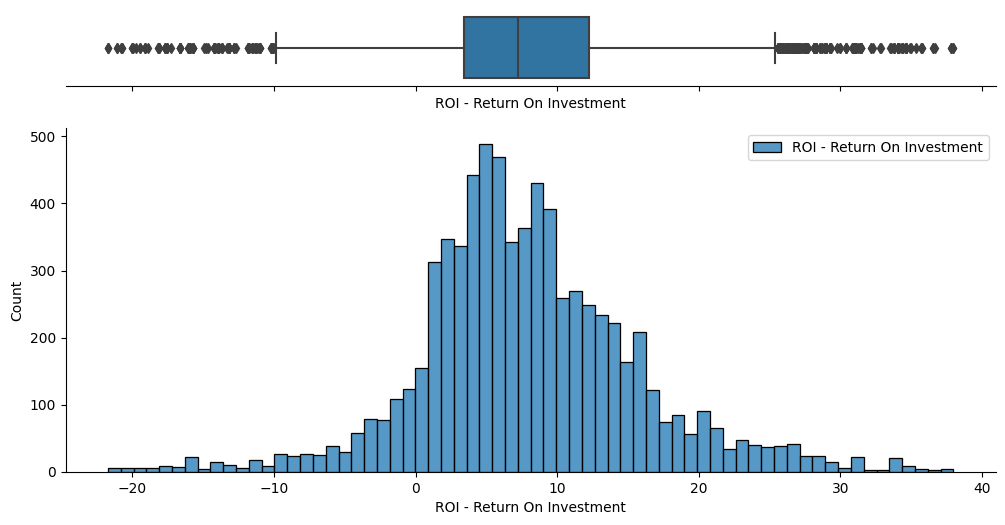

In [210]:
# Box Plot 2: ROI - Return On Investment
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['ROI - Return On Investment'], ax=ax_box, orient="h") 
sns.histplot(df['ROI - Return On Investment'], ax=ax_hist, label='ROI - Return On Investment')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

In [158]:
df.drop(columns='ROI - Return On Investment Outliers', inplace=True)

In [160]:
# Variable Dependiente: 'Free Cash Flow Per Share'
# Identificamos los valores atípicos de acuerdo al modelo Z-Score (Estandarización). 
# Estandarizamos los valores de la variable, para poder comparar todos los valores bajo una misma regla, haciendo más fácil la identificación de valores atípicos.

df['Free Cash Flow Per Share Z'] = (df['Free Cash Flow Per Share'] - df['Free Cash Flow Per Share'].mean())/df['Free Cash Flow Per Share'].std()
df['Free Cash Flow Per Share Outliers'] = 0
df.loc[(df['Free Cash Flow Per Share Z']>3)|(df['Free Cash Flow Per Share Z']<-3) , 'Free Cash Flow Per Share Outliers'] = 1
df[['Free Cash Flow Per Share', 'Free Cash Flow Per Share Z','Free Cash Flow Per Share Outliers']]

,Free Cash Flow Per Share,Free Cash Flow Per Share Z,Free Cash Flow Per Share Outliers
33,0.6584,0.073703,0
8,0.9432,0.112300,0
3,-0.8999,-0.137481,0
16,2.9936,0.390174,0
29,3.9589,0.520993,0
...,...,...,...
7299,-0.6212,-0.099711,0
7434,-0.8027,-0.124308,0
7506,14.4425,1.941750,0
7585,0.4316,0.042967,0


In [212]:
df['Free Cash Flow Per Share Outliers'].value_counts()

Free Cash Flow Per Share Outliers
0    7225
1      60
Name: count, dtype: int64

In [213]:
print(df.loc[df['Free Cash Flow Per Share Outliers']== 1, 'Free Cash Flow Per Share'])

342     -25.6930
242      91.3671
343     -25.6930
288      23.0554
622     -23.3665
623     -23.3665
923     -67.1072
625     -23.3665
626     -23.3665
627     -23.3665
848     -61.0671
924     -67.1072
1048    -60.8999
1212     44.9226
1049    -60.8999
846     -61.0671
849     -61.0671
847      37.8733
1767     42.9103
1768     42.9103
2296   -130.6658
2034     37.8733
2299   -130.6658
2258   -130.6658
2051     37.8733
2297   -130.6658
2300   -130.6658
2035     37.8733
2259   -130.6658
2298   -130.6658
3873     93.6788
4030    107.7377
4092     50.7553
4094    107.7377
4031    107.7377
4096    107.7377
4032    107.7377
4033    107.7377
3711    -32.1013
3712    -32.1013
4095    107.7377
5670    -32.1013
5874   -123.5703
5250    -25.1774
5875   -123.5703
5671    -32.1013
5744     32.4954
6043     32.9236
6112     32.9236
5672    -32.1013
6044     32.9236
5674    -32.1013
6045     32.9236
6113     32.9236
7352     92.6181
7448    -47.2403
7354     92.6181
7446    -47.2403
7447    -47.24

In [214]:
print(df.loc[df['Free Cash Flow Per Share Outliers'] == 1, 'Free Cash Flow Per Share'].max())
print(df.loc[df['Free Cash Flow Per Share Outliers'] == 1, 'Free Cash Flow Per Share'].min())

107.7377
-130.6658


In [215]:
# Creamos un diccionario con la agrupación de las categorías 'Rating','Sector','Year'.
mapping_dict_4 = df.set_index(['Rating','Sector','Year'])['Free Cash Flow Per Share Outliers'].to_dict()
mapping_dict_4

{('Media Inferior', 'Other', 2010): 0,
 ('Media', 'Information Technology', 2010): 0,
 ('Alta', 'Utilities', 2010): 0,
 ('Altamente Especulativa', 'Consumer Staples', 2010): 0,
 ('Media', 'Utilities', 2010): 0,
 ('Especulativa', 'Health Care', 2010): 0,
 ('Media Superior', 'Consumer Staples', 2010): 0,
 ('Media Inferior', 'Industrials', 2010): 0,
 ('Alta', 'Information Technology', 2010): 0,
 ('Media', 'Consumer Staples', 2010): 0,
 ('Media', 'Financials', 2010): 0,
 ('Altamente Especulativa', 'Other', 2010): 0,
 ('Media Inferior', 'Consumer Staples', 2010): 0,
 ('Especulativa', 'Industrials', 2010): 0,
 ('Media Superior', 'Other', 2010): 0,
 ('Especulativa', 'Information Technology', 2010): 0,
 ('Altamente Especulativa', 'Materials', 2010): 0,
 ('Media Superior', 'Utilities', 2010): 0,
 ('Media Inferior', 'Communication Services', 2010): 0,
 ('Especulativa', 'Utilities', 2010): 0,
 ('Media Superior', 'Industrials', 2010): 0,
 ('Altamente Especulativa', 'Information Technology', 2010):

In [216]:
# Valores promedio por agrupación:
average_fcf_s_dict = df.groupby(['Rating','Sector','Year'])['Free Cash Flow Per Share'].mean().to_dict()
average_fcf_s_dict

{('Alta', 'Communication Services', 2013): -17.5786,
 ('Alta', 'Communication Services', 2014): 4.185,
 ('Alta', 'Consumer Discretionary', 2013): -1.2637,
 ('Alta', 'Consumer Discretionary', 2014): -0.292,
 ('Alta', 'Consumer Discretionary', 2015): 0.7591,
 ('Alta', 'Consumer Staples', 2011): 2.16805,
 ('Alta', 'Consumer Staples', 2012): 0.29006666666666664,
 ('Alta', 'Consumer Staples', 2013): -0.7470583333333333,
 ('Alta', 'Consumer Staples', 2014): 0.6074350000000001,
 ('Alta', 'Consumer Staples', 2015): 0.5721652173913043,
 ('Alta', 'Consumer Staples', 2016): -1.4844333333333333,
 ('Alta', 'Energy', 2011): 0.49589999999999995,
 ('Alta', 'Energy', 2012): 3.9993857142857143,
 ('Alta', 'Energy', 2013): -0.008377777777777743,
 ('Alta', 'Energy', 2014): 0.5694291666666668,
 ('Alta', 'Energy', 2015): -3.8306839999999998,
 ('Alta', 'Energy', 2016): 0.53773,
 ('Alta', 'Health Care', 2011): 2.10422,
 ('Alta', 'Health Care', 2012): 0.41130000000000005,
 ('Alta', 'Health Care', 2013): 0.21629

In [220]:
# Utilizamos una función para reemplazar los valores promedios de las categorías, siempre y cuando el valor sea un Outlier.
def replace_with_average(row, average_fcf_s_dict):
    if row['Free Cash Flow Per Share Outliers'] == 1:
        return average_cr_dict.get((row['Rating'], row['Sector'], row['Year']), row['Free Cash Flow Per Share'])
    return row['Free Cash Flow Per Share']

# Reemplazamos el Precio por el Promedio en la misma columna.
df['Free Cash Flow Per Share'] = df.apply(replace_with_average, axis=1, args=(average_fcf_s_dict,))

df_fcf_s_updated = df[df['Free Cash Flow Per Share Outliers'] == 1]

In [221]:
df_fcf_s_updated.groupby(['Rating','Sector','Year'])['Free Cash Flow Per Share'].describe().round(1)

count  mean  std  min  25%  50%  \
Rating                 Sector           Year                                    
Altamente Especulativa Energy           2012    1.0   1.7  NaN  1.7  1.7  1.7   
                                        2014    1.0   1.5  NaN  1.5  1.5  1.5   
                                        2015    2.0   1.1  0.0  1.1  1.1  1.1   
                                        2016    1.0   1.1  NaN  1.1  1.1  1.1   
                       Other            2015    1.0   2.0  NaN  2.0  2.0  2.0   
Especulativa           Energy           2011    1.0   2.3  NaN  2.3  2.3  2.3   
                                        2015    2.0   1.3  0.0  1.3  1.3  1.3   
                                        2016    1.0   1.5  NaN  1.5  1.5  1.5   
Media                  Energy           2014    1.0   1.1  NaN  1.1  1.1  1.1   
Media Inferior         Energy           2011    1.0   1.3  NaN  1.3  1.3  1.3   
                                        2012    2.0   1.2  0.0  1.2  1.2  1.2   
                                        2013    6.0   1.6  0.0  1.6  1.6  1.6   
                                        2014    6.0   1.8  0.0  1.8  1.8  1.8   
                                        2015    2.0   1.5  0.0  1.5  1.5  1.5   
                                        2016    2.0   1.9  0.0  1.9  1.9  1.9   
                       Other            2011    2.0   1.6  0.0  1.6  1.6  1.6   
                                        2014    1.0   2.2  NaN  2.2  2.2  2.2   
                                        2015    1.0   2.0  NaN  2.0  2.0  2.0   
Media Superior         Energy           2013    1.0   1.4  NaN  1.4  1.4  1.4   
                                        2015    1.0   2.1  NaN  2.1  2.1  2.1   
Riesgo Sustancial      Consumer Staples 2012    1.0   2.0  NaN  2.0  2.0  2.0   
                       Energy           2012    6.0   1.2  0.0  1.2  1.2  1.2   
                                        2013    2.0   1.2  0.0  1.2  1.2  1.2   
                                        2016    2.0   1.1  0.0  1.1  1.1  1.1   
                       Other            2012    4.0   2.8  0.0  2.8  2.8  2.8   
                                        2013    3.0   3.5  0.0  3.5  3.5  3.5   
                                        2014    2.0   2.0  0.0  2.0  2.0  2.0   
                                        2015    4.0   2.1  0.0  2.1  2.1  2.1   

                                              75%  max  
Rating                 Sector           Year            
Altamente Especulativa Energy           2012  1.7  1.7  
                                        2014  1.5  1.5  
                                        2015  1.1  1.1  
                                        2016  1.1  1.1  
                       Other            2015  2.0  2.0  
Especulativa           Energy           2011  2.3  2.3  
                                        2015  1.3  1.3  
                                        2016  1.5  1.5  
Media                  Energy           2014  1.1  1.1  
Media Inferior         Energy           2011  1.3  1.3  
                                        2012  1.2  1.2  
                                        2013  1.6  1.6  
                                        2014  1.8  1.8  
                                        2015  1.5  1.5  
                                        2016  1.9  1.9  
                       Other            2011  1.6  1.6  
                                        2014  2.2  2.2  
                                        2015  2.0  2.0  
Media Superior         Energy           2013  1.4  1.4  
                                        2015  2.1  2.1  
Riesgo Sustancial      Consumer Staples 2012  2.0  2.0  
                       Energy           2012  1.2  1.2  
                                        2013  1.2  1.2  
                                        2016  1.1  1.1  
                       Other            2012  2.8  2.8  
                                        2013  3.5  3.5  
                   

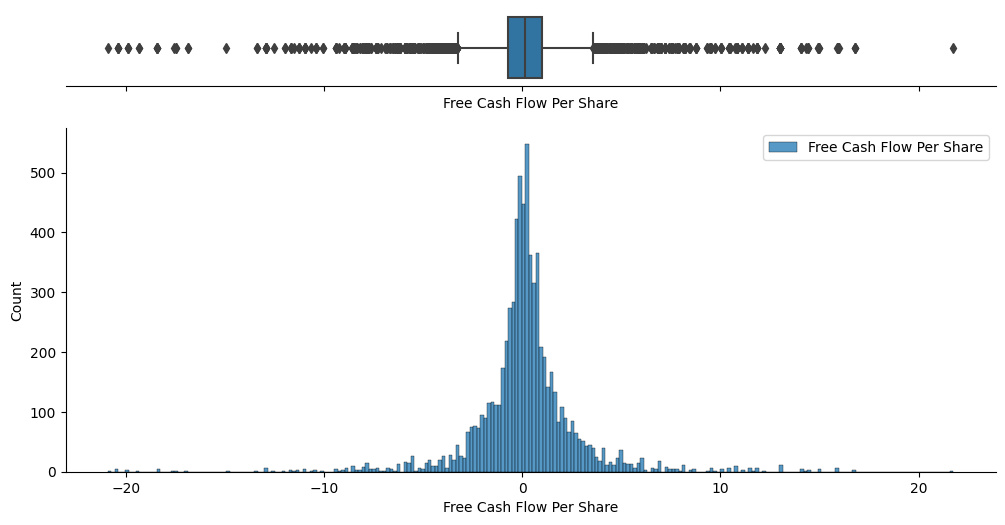

In [222]:
# Box Plot 4: Free Cash Flow Per Share
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['Free Cash Flow Per Share'], ax=ax_box, orient="h") 
sns.histplot(df['Free Cash Flow Per Share'], ax=ax_hist, label='Free Cash Flow Per Share')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

5.3 Correlación de Pearson.

6. Data Wrangling (Munging)

6.1 Tratamiento de Valores Atípicos

6.2 Estandarización Variables

7. Selección del Algoritmo
# https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html

![Captura de pantalla 2024-07-24 200152.jpg](<attachment:Captura de pantalla 2024-07-24 200152.jpg>)
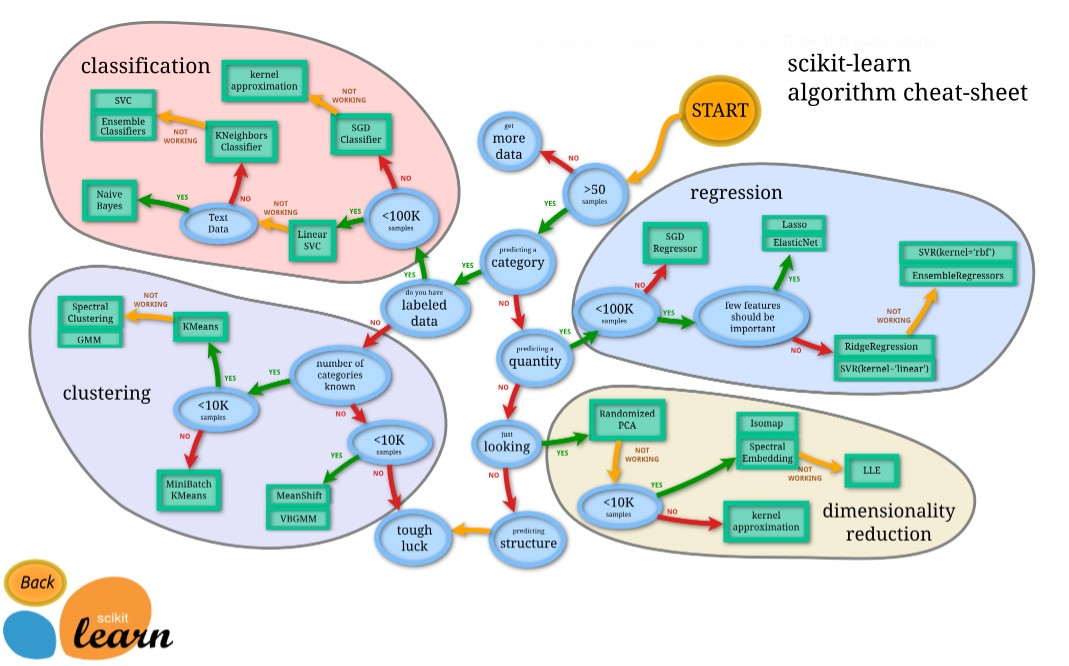

8. Desarrollo del Algoritmo

9. Validación y Despliegue

10. Conclusiones y Recomendaciones